In [1]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [2]:
df = pd.read_csv("Portugal 2022-08-01 to 2023-08-01.csv", na_filter = True)

In [3]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [4]:
df.nunique()

name                  1
datetime            366
tempmax             145
tempmin             131
temp                152
feelslikemax        141
feelslikemin        140
feelslike           157
dew                 145
humidity            260
precip               86
precipprob            2
precipcover           6
preciptype            1
snow                  1
snowdepth             1
windgust            103
windspeed           178
winddir             338
sealevelpressure    181
cloudcover          295
visibility           48
solarradiation      346
solarenergy         206
uvindex              11
severerisk            2
sunrise             366
sunset              366
moonphase            93
conditions            5
description          19
icon                  3
stations              6
dtype: int64

In [5]:
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Portugal,2022-08-01,30.4,19.9,25.6,30.6,19.9,25.7,15.6,55.1,...,19.3,9,10,2022-08-01T06:37:52,2022-08-01T20:47:33,0.13,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08532099999,08534099999,D7126,0853..."
1,Portugal,2022-08-02,31.0,17.7,22.6,31.4,17.7,22.7,16.9,71.9,...,14.5,9,10,2022-08-02T06:38:44,2022-08-02T20:46:32,0.16,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
2,Portugal,2022-08-03,28.0,19.0,22.3,28.6,19.0,22.4,16.9,72.7,...,7.2,3,10,2022-08-03T06:39:37,2022-08-03T20:45:29,0.20,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
3,Portugal,2022-08-04,25.3,19.2,21.1,25.3,19.2,21.1,17.1,78.5,...,7.1,3,10,2022-08-04T06:40:30,2022-08-04T20:44:25,0.23,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
4,Portugal,2022-08-05,26.8,18.6,21.3,27.4,18.6,21.4,17.0,77.7,...,8.9,4,10,2022-08-05T06:41:23,2022-08-05T20:43:20,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."


In [6]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,22.170219,14.040164,17.633333,22.124044,13.771038,17.509290,12.212295,73.609016,1.358077,29.781421,...,22.940437,244.606831,1017.989891,41.038251,10.286612,183.312568,15.837705,6.581967,10.273224,0.474344
std,5.409258,4.440893,4.444690,5.342276,4.942833,4.673284,4.275984,14.262406,5.396396,45.792340,...,6.470541,110.121673,5.562460,22.861156,0.881662,90.978147,7.853592,2.406066,2.324779,0.286268
min,11.300000,2.600000,7.500000,11.300000,0.100000,5.300000,-1.400000,26.100000,0.000000,0.000000,...,7.400000,0.800000,998.400000,0.000000,3.800000,5.300000,0.500000,0.000000,10.000000,0.000000
25%,17.925000,11.000000,14.400000,17.925000,11.000000,14.400000,9.700000,65.875000,0.000000,0.000000,...,18.400000,209.875000,1014.700000,25.475000,10.200000,101.850000,8.800000,5.000000,10.000000,0.232500
50%,22.600000,15.000000,18.150000,22.600000,15.000000,18.150000,13.400000,72.900000,0.000000,0.000000,...,22.200000,279.100000,1017.600000,39.900000,10.500000,177.600000,15.300000,7.000000,10.000000,0.470000
75%,26.500000,17.675000,21.300000,26.375000,17.675000,21.300000,15.400000,84.475000,0.095000,100.000000,...,26.200000,331.450000,1021.350000,57.700000,10.500000,262.375000,22.775000,9.000000,10.000000,0.720000
max,36.100000,22.300000,28.000000,36.100000,22.300000,28.000000,19.900000,99.800000,60.570000,100.000000,...,45.000000,359.900000,1032.700000,91.100000,12.500000,354.000000,30.500000,10.000000,30.000000,0.970000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              366 non-null    object 
 1   datetime          366 non-null    object 
 2   tempmax           366 non-null    float64
 3   tempmin           366 non-null    float64
 4   temp              366 non-null    float64
 5   feelslikemax      366 non-null    float64
 6   feelslikemin      366 non-null    float64
 7   feelslike         366 non-null    float64
 8   dew               366 non-null    float64
 9   humidity          366 non-null    float64
 10  precip            366 non-null    float64
 11  precipprob        366 non-null    int64  
 12  precipcover       366 non-null    float64
 13  preciptype        148 non-null    object 
 14  snow              366 non-null    int64  
 15  snowdepth         366 non-null    int64  
 16  windgust          366 non-null    float64
 1

In [8]:
# ver se existem linhas duplicadas se sim apager se não não fazer nada
print ( df.duplicated().sum() ) # não existem duplicadas por isso não fazemos nada

0


In [9]:
# verificar que na coluna name apenas temos um nome ou seja podemos apagar esta coluna pois não trará nada de novo para o modelo
print ( df['name'].describe() )
df.drop(['name'], inplace = True, axis = 1) # apaga-mos a coluna 'name'
df.head() #verificamos que a coluna não existe mais


count          366
unique           1
top       Portugal
freq           366
Name: name, dtype: object


,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2022-08-01,30.4,19.9,25.6,30.6,19.9,25.7,15.6,55.1,0.0,...,19.3,9,10,2022-08-01T06:37:52,2022-08-01T20:47:33,0.13,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08532099999,08534099999,D7126,0853..."
1,2022-08-02,31.0,17.7,22.6,31.4,17.7,22.7,16.9,71.9,0.0,...,14.5,9,10,2022-08-02T06:38:44,2022-08-02T20:46:32,0.16,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
2,2022-08-03,28.0,19.0,22.3,28.6,19.0,22.4,16.9,72.7,0.0,...,7.2,3,10,2022-08-03T06:39:37,2022-08-03T20:45:29,0.20,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
3,2022-08-04,25.3,19.2,21.1,25.3,19.2,21.1,17.1,78.5,0.0,...,7.1,3,10,2022-08-04T06:40:30,2022-08-04T20:44:25,0.23,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
4,2022-08-05,26.8,18.6,21.3,27.4,18.6,21.4,17.0,77.7,0.0,...,8.9,4,10,2022-08-05T06:41:23,2022-08-05T20:43:20,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."


<Axes: >

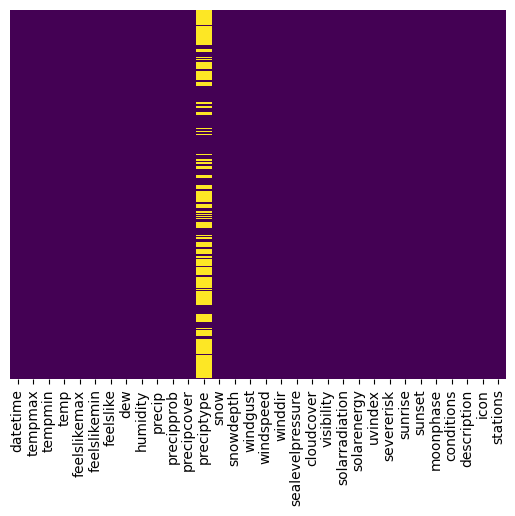

In [10]:
# ver se existem celulas vazias e se existirem temos de decidir preencher ou apagalas
sns.heatmap(df.isnull(),yticklabels= False,  cbar = False, cmap = 'viridis')

In [11]:
# analisar a coluna preciptype e tentar chegar a uma decisão em o que fazer
print(df['preciptype'])
print('\n')
print ( df['preciptype'].describe() )
print('\n')
print ( df['preciptype'].value_counts() )

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
361     NaN
362     NaN
363     NaN
364     NaN
365    rain
Name: preciptype, Length: 366, dtype: object


count      148
unique       1
top       rain
freq       148
Name: preciptype, dtype: object


preciptype
rain    148
Name: count, dtype: int64


In [12]:
# Decidimos como temos muitas entradas em branco que devemos apagar a coluna

df.drop(['preciptype'], inplace = True, axis = 1) # apaga-mos a coluna 'preciptype'

<Axes: >

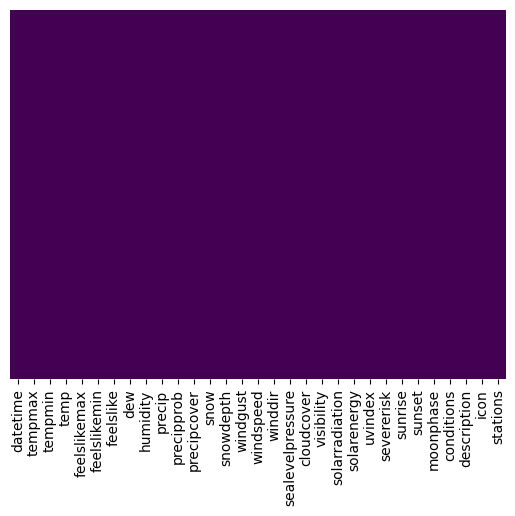

In [13]:
# ver se existem celulas vazias e se existirem temos de decidir preencher ou apagalas
sns.heatmap(df.isnull(),yticklabels= False,  cbar = False, cmap = 'viridis')

In [14]:
df.drop(['datetime'], inplace = True, axis = 1) # apaga-mos a coluna 'datetime' pois já temos essa informação
print (df.info()) #verificarmos que o datetime foi eliminado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           366 non-null    float64
 1   tempmin           366 non-null    float64
 2   temp              366 non-null    float64
 3   feelslikemax      366 non-null    float64
 4   feelslikemin      366 non-null    float64
 5   feelslike         366 non-null    float64
 6   dew               366 non-null    float64
 7   humidity          366 non-null    float64
 8   precip            366 non-null    float64
 9   precipprob        366 non-null    int64  
 10  precipcover       366 non-null    float64
 11  snow              366 non-null    int64  
 12  snowdepth         366 non-null    int64  
 13  windgust          366 non-null    float64
 14  windspeed         366 non-null    float64
 15  winddir           366 non-null    float64
 16  sealevelpressure  366 non-null    float64
 1

In [15]:
df['sunrise'] = pd.to_datetime(df['sunrise'])

# Criando colunas para dia, mês, ano, hora de o sol se levantar, minuto de o sol se levantar, segundo de o sol se levantar
df['Year']   = df['sunrise'].dt.year
df['Day']    = df['sunrise'].dt.day
df['Month']  = df['sunrise'].dt.month

df['hour_rise']   = df['sunrise'].dt.hour
df['minute_rise'] = df['sunrise'].dt.minute
df['second_rise'] = df['sunrise'].dt.second

df.drop(['sunrise'], inplace = True, axis = 1) # apaga-mos a coluna 'sunrise' pois já temos essa informação

print (df.info()) #verificarmos que o sunrise foi eliminado



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           366 non-null    float64
 1   tempmin           366 non-null    float64
 2   temp              366 non-null    float64
 3   feelslikemax      366 non-null    float64
 4   feelslikemin      366 non-null    float64
 5   feelslike         366 non-null    float64
 6   dew               366 non-null    float64
 7   humidity          366 non-null    float64
 8   precip            366 non-null    float64
 9   precipprob        366 non-null    int64  
 10  precipcover       366 non-null    float64
 11  snow              366 non-null    int64  
 12  snowdepth         366 non-null    int64  
 13  windgust          366 non-null    float64
 14  windspeed         366 non-null    float64
 15  winddir           366 non-null    float64
 16  sealevelpressure  366 non-null    float64
 1

In [16]:
df['sunset'] = pd.to_datetime(df['sunset'])

# Criando colunas para dia, mês, ano, hora de o sol se levantar, minuto de o sol se levantar, segundo de o sol se levantar
df['hour_set']   = df['sunset'].dt.hour
df['minute_set'] = df['sunset'].dt.minute
df['second_set'] = df['sunset'].dt.second

df.drop(['sunset'], inplace = True, axis = 1) # apaga-mos a coluna 'sunset' pois já temos essa informação

print (df.info()) #verificarmos que o sunset foi eliminado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           366 non-null    float64
 1   tempmin           366 non-null    float64
 2   temp              366 non-null    float64
 3   feelslikemax      366 non-null    float64
 4   feelslikemin      366 non-null    float64
 5   feelslike         366 non-null    float64
 6   dew               366 non-null    float64
 7   humidity          366 non-null    float64
 8   precip            366 non-null    float64
 9   precipprob        366 non-null    int64  
 10  precipcover       366 non-null    float64
 11  snow              366 non-null    int64  
 12  snowdepth         366 non-null    int64  
 13  windgust          366 non-null    float64
 14  windspeed         366 non-null    float64
 15  winddir           366 non-null    float64
 16  sealevelpressure  366 non-null    float64
 1

In [17]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,stations,Year,Day,Month,hour_rise,minute_rise,second_rise,hour_set,minute_set,second_set
0,30.4,19.9,25.6,30.6,19.9,25.7,15.6,55.1,0.0,0,...,"08535099999,08532099999,08534099999,D7126,0853...",2022,1,8,6,37,52,20,47,33
1,31.0,17.7,22.6,31.4,17.7,22.7,16.9,71.9,0.0,0,...,"08535099999,08532099999,08534099999,D7126,0853...",2022,2,8,6,38,44,20,46,32
2,28.0,19.0,22.3,28.6,19.0,22.4,16.9,72.7,0.0,0,...,"08535099999,08532099999,08534099999,D7126,0853...",2022,3,8,6,39,37,20,45,29
3,25.3,19.2,21.1,25.3,19.2,21.1,17.1,78.5,0.0,0,...,"08535099999,08532099999,08534099999,D7126,0853...",2022,4,8,6,40,30,20,44,25
4,26.8,18.6,21.3,27.4,18.6,21.4,17.0,77.7,0.0,0,...,"08535099999,08532099999,08534099999,D7126,0853...",2022,5,8,6,41,23,20,43,20


Vamos tratar dos restantes atributos object:
 
conditions, 
description, 
icon, 
stations, 

Provavelmente vamos juntar as colunas conditions e description e fazer 6 novas colunas rain_morning, rain_afternoon, cloud_moring, cloud_afternoon,clear_moring, clear_afternoon

In [18]:
# analise do atributo conditions e transformação nele em números
print ( df['conditions'].describe() )
print('\n')
print ( df['conditions'].value_counts() )
print('\n')
print(df['conditions'])

count                  366
unique                   5
top       Partially cloudy
freq                   192
Name: conditions, dtype: object


conditions
Partially cloudy          192
Rain, Partially cloudy    104
Clear                      65
Rain, Overcast              3
Rain                        2
Name: count, dtype: int64


0                       Clear
1            Partially cloudy
2            Partially cloudy
3            Partially cloudy
4            Partially cloudy
                ...          
361          Partially cloudy
362          Partially cloudy
363          Partially cloudy
364          Partially cloudy
365    Rain, Partially cloudy
Name: conditions, Length: 366, dtype: object


In [19]:
# analise do atributo conditions
print ( df['description'].describe() )
print('\n')
print ( df['description'].value_counts() )
print('\n')
print(df['description'])

count                                   366
unique                                   19
top       Partly cloudy throughout the day.
freq                                    161
Name: description, dtype: object


description
Partly cloudy throughout the day.                                             161
Clear conditions throughout the day.                                           65
Partly cloudy throughout the day with morning rain.                            56
Clearing in the afternoon.                                                     23
Partly cloudy throughout the day with rain in the morning and afternoon.       19
Partly cloudy throughout the day with afternoon rain.                          13
Becoming cloudy in the afternoon.                                               8
Partly cloudy throughout the day with a chance of rain throughout the day.      4
Becoming cloudy in the afternoon with morning rain.                             3
Cloudy skies throughout the day with mo

In [20]:
# analise do atributo ico

print ( df['icon'].describe() )
print('\n')
print ( df['icon'].value_counts() )
print('\n')
print(df['icon'])

count                   366
unique                    3
top       partly-cloudy-day
freq                    192
Name: icon, dtype: object


icon
partly-cloudy-day    192
rain                 109
clear-day             65
Name: count, dtype: int64


0              clear-day
1      partly-cloudy-day
2      partly-cloudy-day
3      partly-cloudy-day
4      partly-cloudy-day
             ...        
361    partly-cloudy-day
362    partly-cloudy-day
363    partly-cloudy-day
364    partly-cloudy-day
365                 rain
Name: icon, Length: 366, dtype: object


In [21]:
# Realize o groupby 
iguais = ['conditions','description', 'icon']
df_novo = df[iguais]
print(df_novo.head())

         conditions                           description               icon
0             Clear  Clear conditions throughout the day.          clear-day
1  Partially cloudy            Clearing in the afternoon.  partly-cloudy-day
2  Partially cloudy            Clearing in the afternoon.  partly-cloudy-day
3  Partially cloudy     Partly cloudy throughout the day.  partly-cloudy-day
4  Partially cloudy     Partly cloudy throughout the day.  partly-cloudy-day


In [22]:
# Calcular a contagem de todas as combinações de categorias de cada coluna
contagem_combinacoes = df.groupby(['conditions', 'description', 'icon']).size().reset_index(name='count')

# exibir um dataset com a contagem da intercessão das diferentes combinações de categorias
print(contagem_combinacoes)

                conditions                                        description  \
0                    Clear               Clear conditions throughout the day.   
1         Partially cloudy                  Becoming cloudy in the afternoon.   
2         Partially cloudy                         Clearing in the afternoon.   
3         Partially cloudy                  Partly cloudy throughout the day.   
4                     Rain  Clear conditions throughout the day with morni...   
5           Rain, Overcast  Cloudy skies throughout the day with afternoon...   
6           Rain, Overcast  Cloudy skies throughout the day with morning r...   
7   Rain, Partially cloudy  Becoming cloudy in the afternoon with morning ...   
8   Rain, Partially cloudy  Becoming cloudy in the afternoon with rain in ...   
9   Rain, Partially cloudy     Clearing in the afternoon with afternoon rain.   
10  Rain, Partially cloudy  Clearing in the afternoon with early morning r...   
11  Rain, Partially cloudy  

Criar os atributos binários a partir da coluna descrição (temdo em conta o dataset triplo anterior)

In [23]:
# Criar os atributos binários
df['rain_morning'] = (df['description'].str.contains('morning rain') |
                      #df['description'].str.contains('Clearing in the afternoon with early morning rain') |
                      #df['description'].str.contains('Partly cloudy throughout the day with morning rain') |
                      df['description'].str.contains('Partly cloudy throughout the day with rain in the morning and afternoon') |
                      df['description'].str.contains('Partly cloudy throughout the day with a chance of rain throughout the day') |
                      # eu tirava este(o de cima)
                      #df['description'].str.contains('Becoming cloudy in the afternoon with morning rain') |
                      #df['description'].str.contains('Cloudy skies throughout the day with morning rain') |
                      #df['description'].str.contains('Clear conditions throughout the day with morning rain') |
                      df['description'].str.contains('with rain clearing later') |
                      #df['description'].str.contains('Becoming cloudy in the afternoon with rain in the morning and afternoon') |
                      df['description'].str.contains('with rain')).astype(int)

In [24]:
#df['rain_afternoon'] = (df['description'].str.contains('Clearing in the afternoon with afternoon rain') |
#                        df['description'].str.contains('Partly cloudy throughout the day with rain in the morning and afternoon') |
 #                       df['description'].str.contains('Partly cloudy throughout the day with afternoon rain')
 #                       # Adicione mais condições aqui conforme necessário
 #                      ).astype(int)
                       
#esta versao deve apanhar mais
df['rain_afternoon'] = (df['description'].str.contains('afternoon rain') |
                        df['description'].str.contains('rain in the morning and afternoon') |
                        df['description'].str.contains('Partly cloudy throughout the day with rain')
                       ).astype(int)

In [25]:
df['cloud_morning'] = (df['description'].str.contains('Clearing in the afternoon') |
                       df['description'].str.contains('Partly cloudy throughout the day') |
                       #df['description'].str.contains('Partly cloudy throughout the day with afternoon rain.') |
                       #df['description'].str.contains('Partly cloudy throughout the day with late afternoon rain.') |
                       df['description'].str.contains('Cloudy skies throughout the day')
                      ).astype(int)

In [26]:
df['cloud_afternoon'] = (df['description'].str.contains('Partly cloudy throughout the day') |
                         #df['description'].str.contains('Partly cloudy throughout the day with morning rain.') |
                         df['description'].str.contains('Becoming cloudy in the afternoon') |
                         #df['description'].str.contains('Becoming cloudy in the afternoon with morning rain.') |
                         df['description'].str.contains('Cloudy skies throughout the day')
                        ).astype(int)

In [27]:
df['clear_morning'] = (df['description'].str.contains('Clear conditions throughout the day.') |
                      df['description'].str.contains('Becoming cloudy in the afternoon.')
                     ).astype(int)

In [28]:
df['clear_afternoon'] = (df['description'].str.contains('Clear conditions throughout the day') |
                        df['description'].str.contains('Clearing in the afternoon') #|
                        #df['description'].str.contains('Clearing in the afternoon with morning rain.') |
                        #df['description'].str.contains('Clearing in the afternoon with early morning rain.') |
                        #df['description'].str.contains('Clearing in the afternoon with afternoon rain.') |
                        #df['description'].str.contains('Clear conditions throughout the day with morning rain.') |
                        #df['description'].str.contains('Partly cloudy throughout the day with rain clearing later.')
                       ).astype(int)

df.drop(['description'], inplace = True, axis = 1)
df.drop(['conditions'], inplace = True, axis = 1)
df.drop(['icon'], inplace = True, axis = 1)
print ( df.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           366 non-null    float64
 1   tempmin           366 non-null    float64
 2   temp              366 non-null    float64
 3   feelslikemax      366 non-null    float64
 4   feelslikemin      366 non-null    float64
 5   feelslike         366 non-null    float64
 6   dew               366 non-null    float64
 7   humidity          366 non-null    float64
 8   precip            366 non-null    float64
 9   precipprob        366 non-null    int64  
 10  precipcover       366 non-null    float64
 11  snow              366 non-null    int64  
 12  snowdepth         366 non-null    int64  
 13  windgust          366 non-null    float64
 14  windspeed         366 non-null    float64
 15  winddir           366 non-null    float64
 16  sealevelpressure  366 non-null    float64
 1

In [29]:
# analise do atributo precip

print ( df['precip'].describe() )
print('\n')
print ( df['precip'].value_counts() )
print('\n')
print(df['precip'])

# conlcusão é util

count    366.000000
mean       1.358077
std        5.396396
min        0.000000
25%        0.000000
50%        0.000000
75%        0.095000
max       60.570000
Name: precip, dtype: float64


precip
0.000    257
0.100      9
0.001      4
0.080      3
9.000      3
        ... 
4.300      1
0.761      1
1.325      1
5.393      1
0.970      1
Name: count, Length: 86, dtype: int64


0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
361    0.00
362    0.00
363    0.00
364    0.00
365    0.02
Name: precip, Length: 366, dtype: float64


In [30]:
# analise do atributo precipprob
print ( df['precipprob'].describe() )
print('\n')
print ( df['precipprob'].value_counts() )
print('\n')
print(df['precipprob'])
# vemos que é um atributo que é ou 0 ou 100, para dizer se chove ou não logo como já temos as 
#colunas rain_morning and rain_afternoon concluimos que ele é inutil

count    366.000000
mean      29.781421
std       45.792340
min        0.000000
25%        0.000000
50%        0.000000
75%      100.000000
max      100.000000
Name: precipprob, dtype: float64


precipprob
0      257
100    109
Name: count, dtype: int64


0        0
1        0
2        0
3        0
4        0
      ... 
361      0
362      0
363      0
364      0
365    100
Name: precipprob, Length: 366, dtype: int64


In [31]:
df.drop(['precipprob'], inplace = True, axis = 1) # apagar a coluna inutil

In [32]:
# analise do atributo precipcover
print ( df['precipcover'].describe() )
print('\n')
print ( df['precipcover'].value_counts() )
print('\n')
print(df['precipcover'])
# é util deve ficar

count    366.000000
mean       1.890355
std        5.372178
min        0.000000
25%        0.000000
50%        0.000000
75%        4.170000
max       79.170000
Name: precipcover, dtype: float64


precipcover
0.00     257
4.17      83
8.33      22
20.83      2
79.17      1
41.67      1
Name: count, dtype: int64


0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
361    0.00
362    0.00
363    0.00
364    0.00
365    4.17
Name: precipcover, Length: 366, dtype: float64


In [33]:
print (df.nunique())
print('---------------------------------------------------')
print(df.info())

tempmax             145
tempmin             131
temp                152
feelslikemax        141
feelslikemin        140
feelslike           157
dew                 145
humidity            260
precip               86
precipcover           6
snow                  1
snowdepth             1
windgust            103
windspeed           178
winddir             338
sealevelpressure    181
cloudcover          295
visibility           48
solarradiation      346
solarenergy         206
uvindex              11
severerisk            2
moonphase            93
stations              6
Year                  2
Day                  31
Month                12
hour_rise             3
minute_rise          60
second_rise          60
hour_set              5
minute_set           60
second_set           60
rain_morning          2
rain_afternoon        2
cloud_morning         2
cloud_afternoon       2
clear_morning         2
clear_afternoon       2
dtype: int64
---------------------------------------------------

Temos de alterar as colunas que têm muitos valores unicos, depois falar com o pessoal para dicutir qual deve ser o numero aceitavel de valores unicos.

Neste momento as colunas que têm de ser reconfiguradas são: winddir,solarradiation ,solarenergy, cloudcover,humidity e winddir.

In [34]:
# analise do atributo precipcover
print ( df['cloudcover'].describe() )
print('\n')
print ( df['cloudcover'].value_counts() )
print('\n')
print(df['cloudcover'].nunique())
print('\n')
print(df['cloudcover'])

# dar bind
#df['winddir'] = df['winddir'].round().astype(int)

print('---------------------------------------------')


#print ( df['winddir'].describe() )
#print('\n')
#print ( df['winddir'].value_counts() )
#print('\n')
#print(df['winddir'].nunique())
#print('\n')
#print(df['winddir'])

count    366.000000
mean      41.038251
std       22.861156
min        0.000000
25%       25.475000
50%       39.900000
75%       57.700000
max       91.100000
Name: cloudcover, dtype: float64


cloudcover
0.0     8
49.8    4
50.4    3
39.5    3
69.5    3
       ..
90.1    1
71.9    1
62.0    1
40.9    1
31.3    1
Name: count, Length: 295, dtype: int64


295


0      12.4
1      27.1
2      44.3
3      67.5
4      67.3
       ... 
361    35.7
362    50.1
363    25.0
364    31.3
365    55.2
Name: cloudcover, Length: 366, dtype: float64
---------------------------------------------


In [35]:
# analise do atributo precipcover
print ( df['windspeed'].describe() )
print('\n')
print ( df['windspeed'].value_counts() )
print('\n')
print(df['windspeed'].nunique())
print('\n')
print(df['windspeed'])

#dar bind
#df['windspeed'] = df['windspeed'].round().astype(int)
print('-----------------------------------------------------------')

#print ( df['windspeed'].describe() )
#print('\n')
#print ( df['windspeed'].value_counts() )
#print('\n')
#print(df['windspeed'].nunique())
#print('\n')
#print(df['windspeed'])

count    366.000000
mean      22.940437
std        6.470541
min        7.400000
25%       18.400000
50%       22.200000
75%       26.200000
max       45.000000
Name: windspeed, dtype: float64


windspeed
22.0    8
25.4    8
21.1    8
21.6    7
28.4    7
       ..
33.5    1
30.3    1
26.4    1
38.6    1
29.5    1
Name: count, Length: 178, dtype: int64


178


0      21.5
1      25.6
2      25.3
3      24.4
4      24.1
       ... 
361    25.0
362    25.2
363    26.1
364    28.3
365    31.1
Name: windspeed, Length: 366, dtype: float64
-----------------------------------------------------------


In [36]:
# analise do atributo precipcover
print ( df['winddir'].describe() )
print('\n')
print ( df['winddir'].value_counts() )
print('\n')
print(df['winddir'].nunique())
print('\n')
print(df['winddir'])

# dar bind
#df['winddir'] = df['winddir'].round().astype(int)

#print('---------------------------------------------')


#print ( df['winddir'].describe() )
#print('\n')
#print ( df['winddir'].value_counts() )
#print('\n')
#print(df['winddir'].nunique())
#print('\n')
#print(df['winddir'])

count    366.000000
mean     244.606831
std      110.121673
min        0.800000
25%      209.875000
50%      279.100000
75%      331.450000
max      359.900000
Name: winddir, dtype: float64


winddir
323.4    2
349.0    2
33.9     2
330.9    2
334.2    2
        ..
350.6    1
41.6     1
7.9      1
229.3    1
340.0    1
Name: count, Length: 338, dtype: int64


338


0      252.6
1      269.5
2      335.5
3      338.9
4      310.1
       ...  
361    327.9
362    321.6
363    334.2
364    331.3
365    340.0
Name: winddir, Length: 366, dtype: float64


In [37]:
# analise do atributo stations

print ( df['stations'].describe() )
print('\n')
print ( df['stations'].value_counts() )
print('\n')
print(df['stations'])

# Criar uma lista única de todas as estações
all_stations = set(','.join(df['stations']).split(','))

# Criar colunas binárias para cada estação
for station in all_stations:
    df[station] = df['stations'].apply(lambda x: int(station in x))

# Remover a coluna original 'stations'
df = df.drop('stations', axis=1)

print('\n')
df.info()

count                                                366
unique                                                 6
top       08532099999,08534099999,D7126,08536099999,LPPT
freq                                                 151
Name: stations, dtype: object


stations
08532099999,08534099999,D7126,08536099999,LPPT                151
08535099999,08532099999,08534099999,D7126,08536099999,LPPT     78
08534099999,D7126,08536099999,LPPT                             71
08535099999,08534099999,D7126,08536099999,LPPT                 29
08532099999,08534099999,08536099999,LPPT                       25
08534099999,08536099999,LPPT                                   12
Name: count, dtype: int64


0      08535099999,08532099999,08534099999,D7126,0853...
1      08535099999,08532099999,08534099999,D7126,0853...
2      08535099999,08532099999,08534099999,D7126,0853...
3      08535099999,08532099999,08534099999,D7126,0853...
4      08535099999,08532099999,08534099999,D7126,0853...
                      

In [38]:
df.nunique()

tempmax             145
tempmin             131
temp                152
feelslikemax        141
feelslikemin        140
feelslike           157
dew                 145
humidity            260
precip               86
precipcover           6
snow                  1
snowdepth             1
windgust            103
windspeed           178
winddir             338
sealevelpressure    181
cloudcover          295
visibility           48
solarradiation      346
solarenergy         206
uvindex              11
severerisk            2
moonphase            93
Year                  2
Day                  31
Month                12
hour_rise             3
minute_rise          60
second_rise          60
hour_set              5
minute_set           60
second_set           60
rain_morning          2
rain_afternoon        2
cloud_morning         2
cloud_afternoon       2
clear_morning         2
clear_afternoon       2
D7126                 2
08534099999           1
LPPT                  1
08532099999     

In [39]:
#alalise do atributo severerisk
print ( df['severerisk'].describe() )
print('\n')
print ( df['severerisk'].value_counts() )

count    366.000000
mean      10.273224
std        2.324779
min       10.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       30.000000
Name: severerisk, dtype: float64


severerisk
10    361
30      5
Name: count, dtype: int64


In [40]:
# Nunca nevou logo esta coluna é unutil
print ( df['snow'].describe() )
print('\n')
print ( df['snow'].value_counts() )
df.drop(['snow'], inplace = True, axis = 1)
df.info()

count    366.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: snow, dtype: float64


snow
0    366
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           366 non-null    float64
 1   tempmin           366 non-null    float64
 2   temp              366 non-null    float64
 3   feelslikemax      366 non-null    float64
 4   feelslikemin      366 non-null    float64
 5   feelslike         366 non-null    float64
 6   dew               366 non-null    float64
 7   humidity          366 non-null    float64
 8   precip            366 non-null    float64
 9   precipcover       366 non-null    float64
 10  snowdepth         366 non-null    int64  
 11  windgust          366 non-null    float64
 12  windspeed         366 non-null    float64
 

In [41]:
# Nunca nevou logo esta coluna é unutil
print ( df['snowdepth'].describe() )
print('\n')
print ( df['snowdepth'].value_counts() )
df.drop(['snowdepth'], inplace = True, axis = 1)
df.info()

count    366.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: snowdepth, dtype: float64


snowdepth
0    366
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           366 non-null    float64
 1   tempmin           366 non-null    float64
 2   temp              366 non-null    float64
 3   feelslikemax      366 non-null    float64
 4   feelslikemin      366 non-null    float64
 5   feelslike         366 non-null    float64
 6   dew               366 non-null    float64
 7   humidity          366 non-null    float64
 8   precip            366 non-null    float64
 9   precipcover       366 non-null    float64
 10  windgust          366 non-null    float64
 11  windspeed         366 non-null    float64
 12  winddir           366 non-null   

In [42]:
# Esta estação reguistou sempre os dados meteriológicos de todos os dias loga esta coluna é unutil 
print ( df['08534099999'].describe() )
print('\n')
print ( df['08534099999'].value_counts() )
df.drop(['08534099999'], inplace = True, axis = 1)
df.info()

count    366.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: 08534099999, dtype: float64


08534099999
1    366
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           366 non-null    float64
 1   tempmin           366 non-null    float64
 2   temp              366 non-null    float64
 3   feelslikemax      366 non-null    float64
 4   feelslikemin      366 non-null    float64
 5   feelslike         366 non-null    float64
 6   dew               366 non-null    float64
 7   humidity          366 non-null    float64
 8   precip            366 non-null    float64
 9   precipcover       366 non-null    float64
 10  windgust          366 non-null    float64
 11  windspeed         366 non-null    float64
 12  winddir           366 non-nul

In [43]:
# Esta estação reguistou sempre os dados meteriológicos de todos os dias loga esta coluna é unutil 
print ( df['08536099999'].describe() )
print('\n')
print ( df['08536099999'].value_counts() )
df.drop(['08536099999'], inplace = True, axis = 1)
df.info()

count    366.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: 08536099999, dtype: float64


08536099999
1    366
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           366 non-null    float64
 1   tempmin           366 non-null    float64
 2   temp              366 non-null    float64
 3   feelslikemax      366 non-null    float64
 4   feelslikemin      366 non-null    float64
 5   feelslike         366 non-null    float64
 6   dew               366 non-null    float64
 7   humidity          366 non-null    float64
 8   precip            366 non-null    float64
 9   precipcover       366 non-null    float64
 10  windgust          366 non-null    float64
 11  windspeed         366 non-null    float64
 12  winddir           366 non-nul

In [44]:
# Esta estação reguistou sempre os dados meteriológicos de todos os dias loga esta coluna é unutil 
print ( df['LPPT'].describe() )
print('\n')
print ( df['LPPT'].value_counts() )
df.drop(['LPPT'], inplace = True, axis = 1)
df.info()

count    366.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: LPPT, dtype: float64


LPPT
1    366
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           366 non-null    float64
 1   tempmin           366 non-null    float64
 2   temp              366 non-null    float64
 3   feelslikemax      366 non-null    float64
 4   feelslikemin      366 non-null    float64
 5   feelslike         366 non-null    float64
 6   dew               366 non-null    float64
 7   humidity          366 non-null    float64
 8   precip            366 non-null    float64
 9   precipcover       366 non-null    float64
 10  windgust          366 non-null    float64
 11  windspeed         366 non-null    float64
 12  winddir           366 non-null    float64
 

In [45]:
df.nunique()

tempmax             145
tempmin             131
temp                152
feelslikemax        141
feelslikemin        140
feelslike           157
dew                 145
humidity            260
precip               86
precipcover           6
windgust            103
windspeed           178
winddir             338
sealevelpressure    181
cloudcover          295
visibility           48
solarradiation      346
solarenergy         206
uvindex              11
severerisk            2
moonphase            93
Year                  2
Day                  31
Month                12
hour_rise             3
minute_rise          60
second_rise          60
hour_set              5
minute_set           60
second_set           60
rain_morning          2
rain_afternoon        2
cloud_morning         2
cloud_afternoon       2
clear_morning         2
clear_afternoon       2
D7126                 2
08532099999           2
08535099999           2
dtype: int64

In [46]:
print ( df['solarenergy'].describe() )
print('\n')
print(df['solarenergy'].value_counts())
i = 1
for v in df['solarenergy']:
    print("Valor ",i,"é ",v)
    i +=1

count    366.000000
mean      15.837705
std        7.853592
min        0.500000
25%        8.800000
50%       15.300000
75%       22.775000
max       30.500000
Name: solarenergy, dtype: float64


solarenergy
24.5    5
14.5    4
8.1     4
5.1     4
12.0    4
       ..
1.2     1
2.7     1
10.3    1
2.2     1
15.5    1
Name: count, Length: 206, dtype: int64
Valor  1 é  19.3
Valor  2 é  14.5
Valor  3 é  7.2
Valor  4 é  7.1
Valor  5 é  8.9
Valor  6 é  16.4
Valor  7 é  23.9
Valor  8 é  22.4
Valor  9 é  23.3
Valor  10 é  22.5
Valor  11 é  15.7
Valor  12 é  24.3
Valor  13 é  23.7
Valor  14 é  23.8
Valor  15 é  23.1
Valor  16 é  18.8
Valor  17 é  22.8
Valor  18 é  24.3
Valor  19 é  24.2
Valor  20 é  22.4
Valor  21 é  21.3
Valor  22 é  17.2
Valor  23 é  20.5
Valor  24 é  8.0
Valor  25 é  9.5
Valor  26 é  10.5
Valor  27 é  15.4
Valor  28 é  23.5
Valor  29 é  21.0
Valor  30 é  22.7
Valor  31 é  20.9
Valor  32 é  20.8
Valor  33 é  19.2
Valor  34 é  22.1
Valor  35 é  21.9
Valor  36 é  21.1
Valor  37

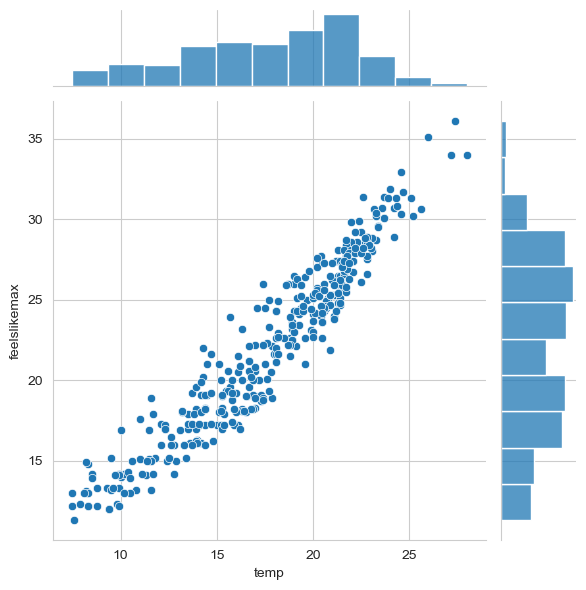

In [47]:
sns.set_style("whitegrid")
sns.jointplot(x= 'temp', y= 'feelslikemax', data=df, kind='scatter')

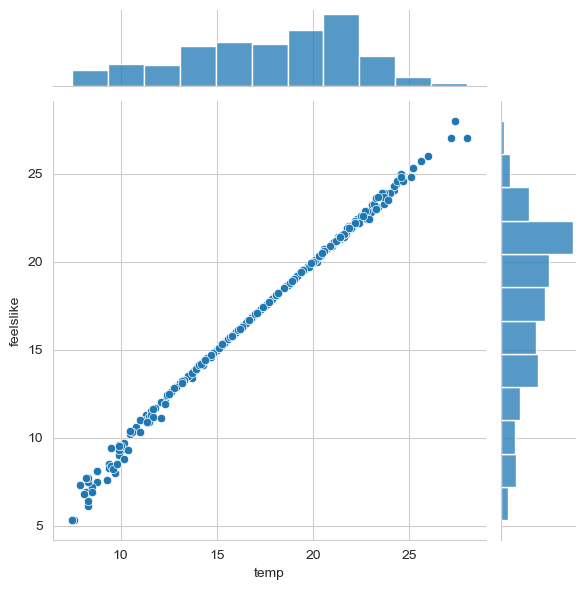

In [48]:
sns.set_style("whitegrid")
sns.jointplot(x= 'temp', y= 'feelslike', data=df, kind='scatter')

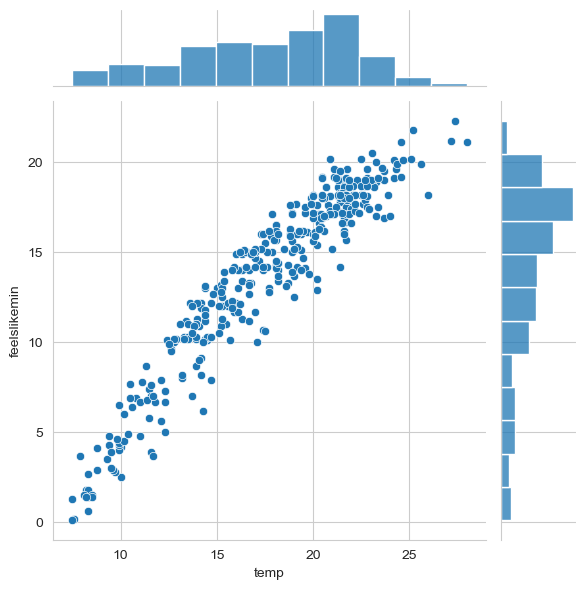

In [49]:
sns.set_style("whitegrid")
sns.jointplot(x= 'temp', y= 'feelslikemin', data=df, kind='scatter')

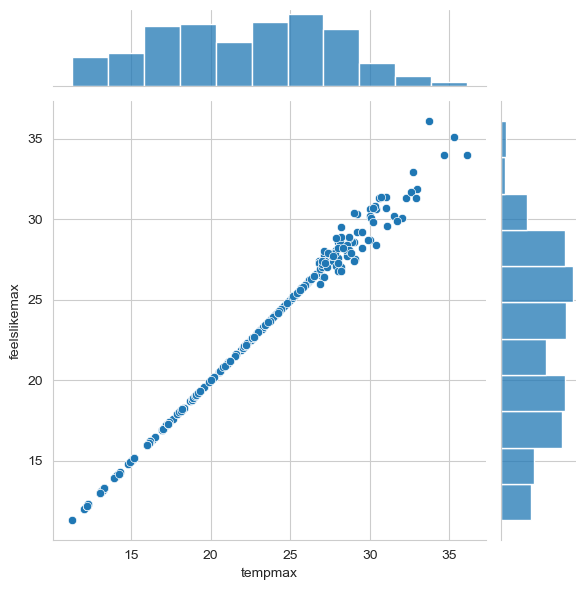

In [50]:
sns.set_style("whitegrid")
sns.jointplot(x= 'tempmax', y= 'feelslikemax', data=df, kind='scatter')

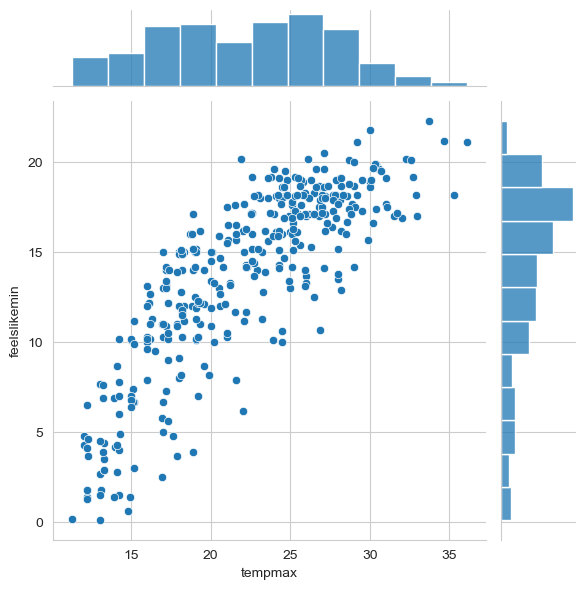

In [51]:
sns.set_style("whitegrid")
sns.jointplot(x= 'tempmax', y= 'feelslikemin', data=df, kind='scatter')

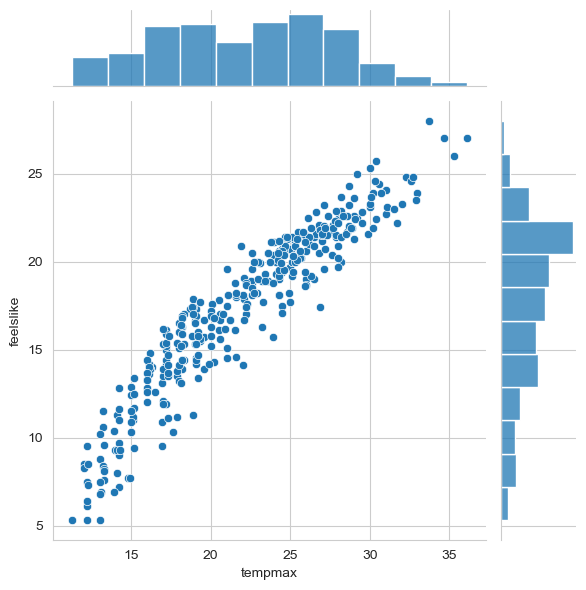

In [52]:
sns.set_style("whitegrid")
sns.jointplot(x= 'tempmax', y= 'feelslike', data=df, kind='scatter')

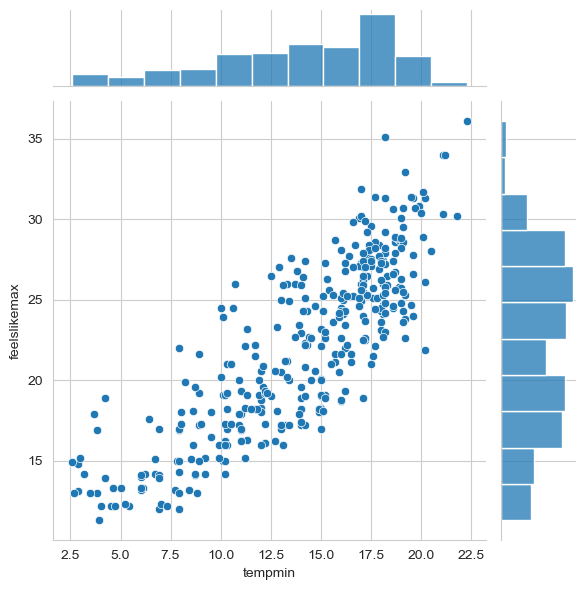

In [53]:
sns.set_style("whitegrid")
sns.jointplot(x= 'tempmin', y= 'feelslikemax', data=df, kind='scatter')

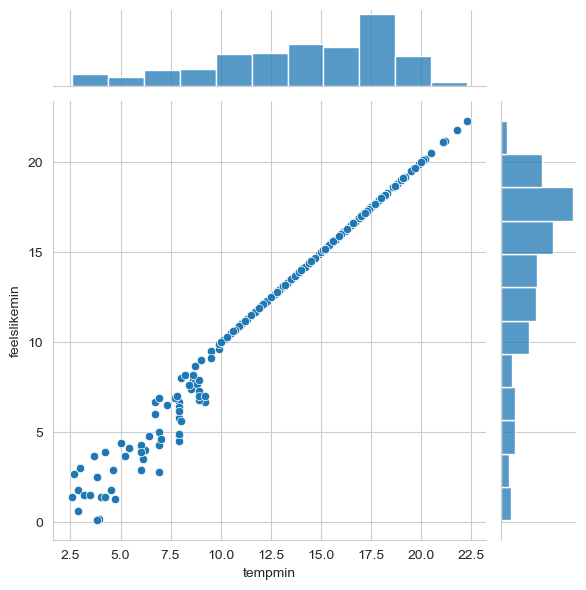

In [54]:
sns.set_style("whitegrid")
sns.jointplot(x= 'tempmin', y= 'feelslikemin', data=df, kind='scatter')

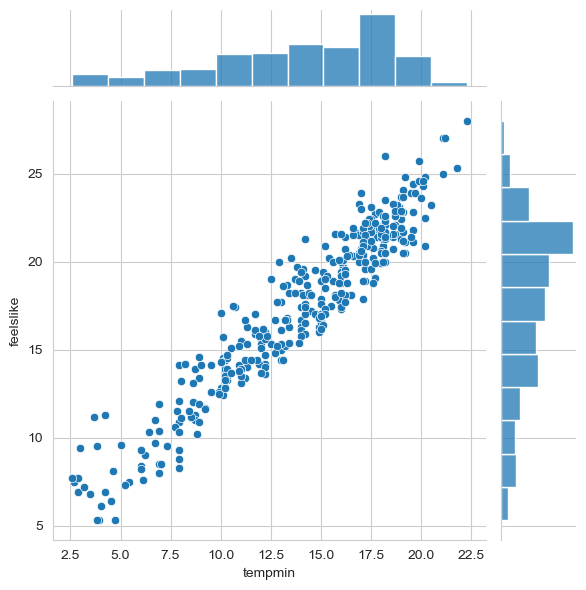

In [55]:
sns.set_style("whitegrid")
sns.jointplot(x= 'tempmin', y= 'feelslike', data=df, kind='scatter')

Por observasão dos gráficos e da matriz de confusão concluimos que os atributos de feels like e a temperatura são quase maximos 
logo procedemos á sua eleminação

In [56]:
df.drop(['feelslikemin'], inplace = True, axis = 1)
df.drop(['feelslikemax'], inplace = True, axis = 1)
df.drop(['feelslike'], inplace = True, axis = 1)

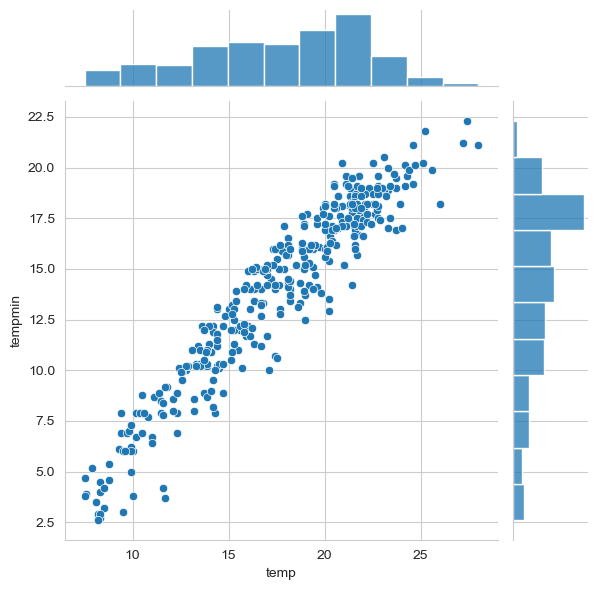

In [57]:
sns.set_style("whitegrid")
sns.jointplot(x= 'temp', y= 'tempmin', data=df, kind='scatter')

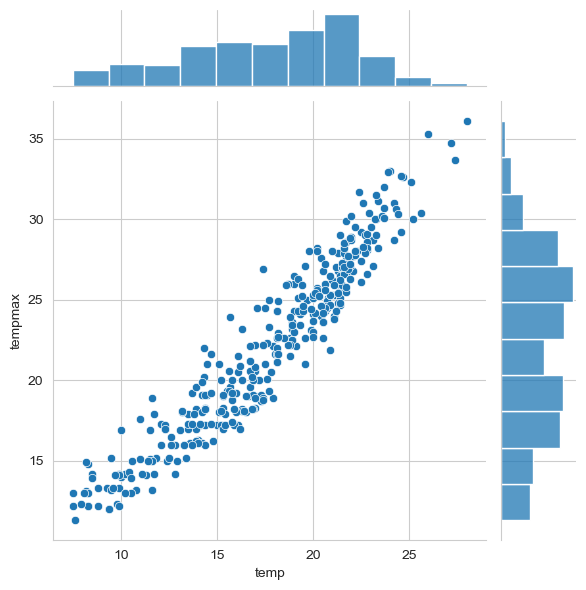

In [58]:
sns.set_style("whitegrid")
sns.jointplot(x= 'temp', y= 'tempmax', data=df, kind='scatter')

Pela mesma razão de cima decidimos apagar

In [59]:
df.drop(['temp'], inplace = True, axis = 1)

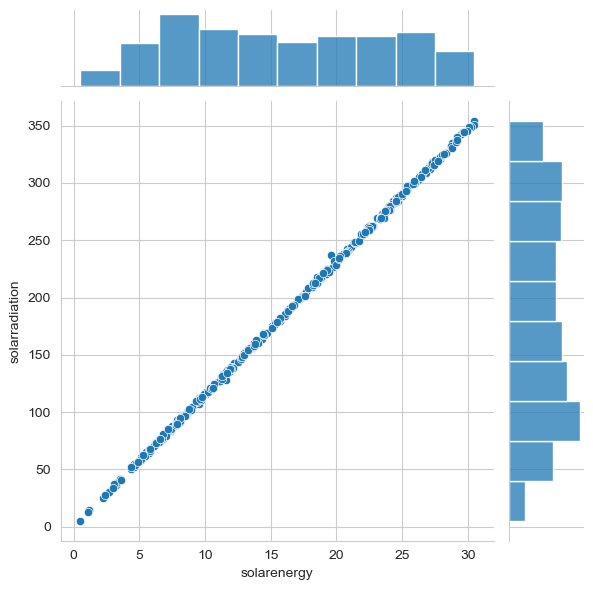

In [60]:
sns.set_style("whitegrid")
sns.jointplot(x= 'solarenergy', y= 'solarradiation', data=df, kind='scatter')

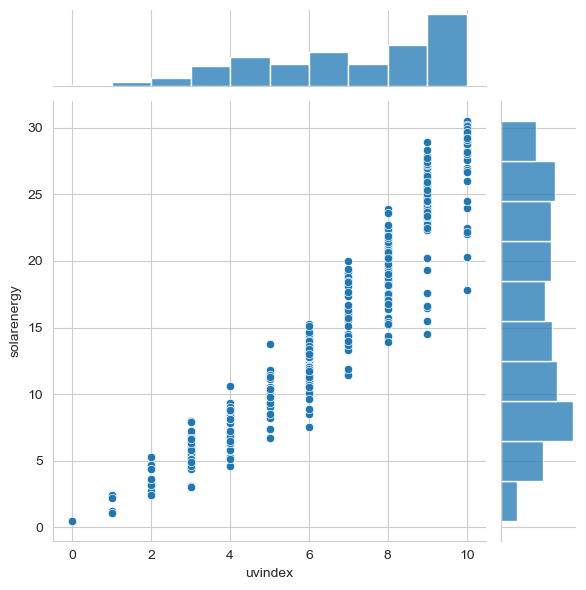

In [61]:
sns.set_style("whitegrid")
sns.jointplot(x= 'uvindex', y= 'solarenergy', data=df, kind='scatter')

Mais uma vez pelas mesmas razões vamos eleminar o atributo de solarradiation

In [62]:
df.drop(['solarradiation'], inplace = True, axis = 1)

Pela observação da matriz de correlação conseguimos observar que o clear_morning e cloud_morning têm um fator de correlação de -1 ou seja quando um sobe o outro desce ou seja podemos retirar um deles o mesmo racioncinio pode ser dito para os atributos clear_afternoon e cloud_afternoon

In [63]:
df.drop(['clear_morning'], inplace = True, axis = 1)
df.drop(['clear_afternoon'], inplace = True, axis = 1)

<Axes: xlabel='uvindex', ylabel='solarenergy'>

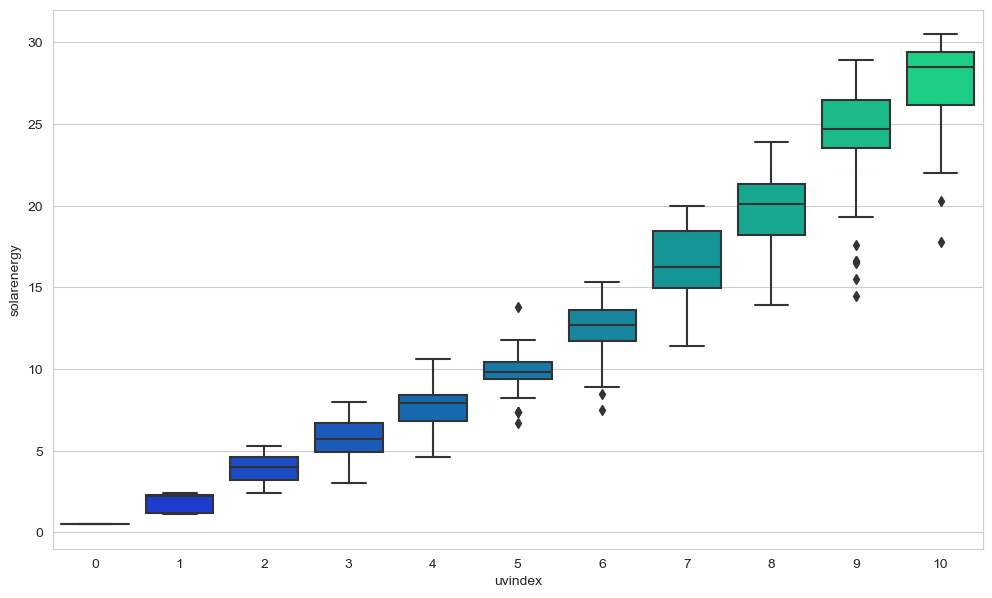

In [64]:
plt.figure(figsize = (12,7) )
sns.boxplot(x = 'uvindex', y ='solarenergy', data = df, palette = 'winter')

In [65]:
df.drop(['uvindex'], inplace = True, axis = 1)

<Axes: >

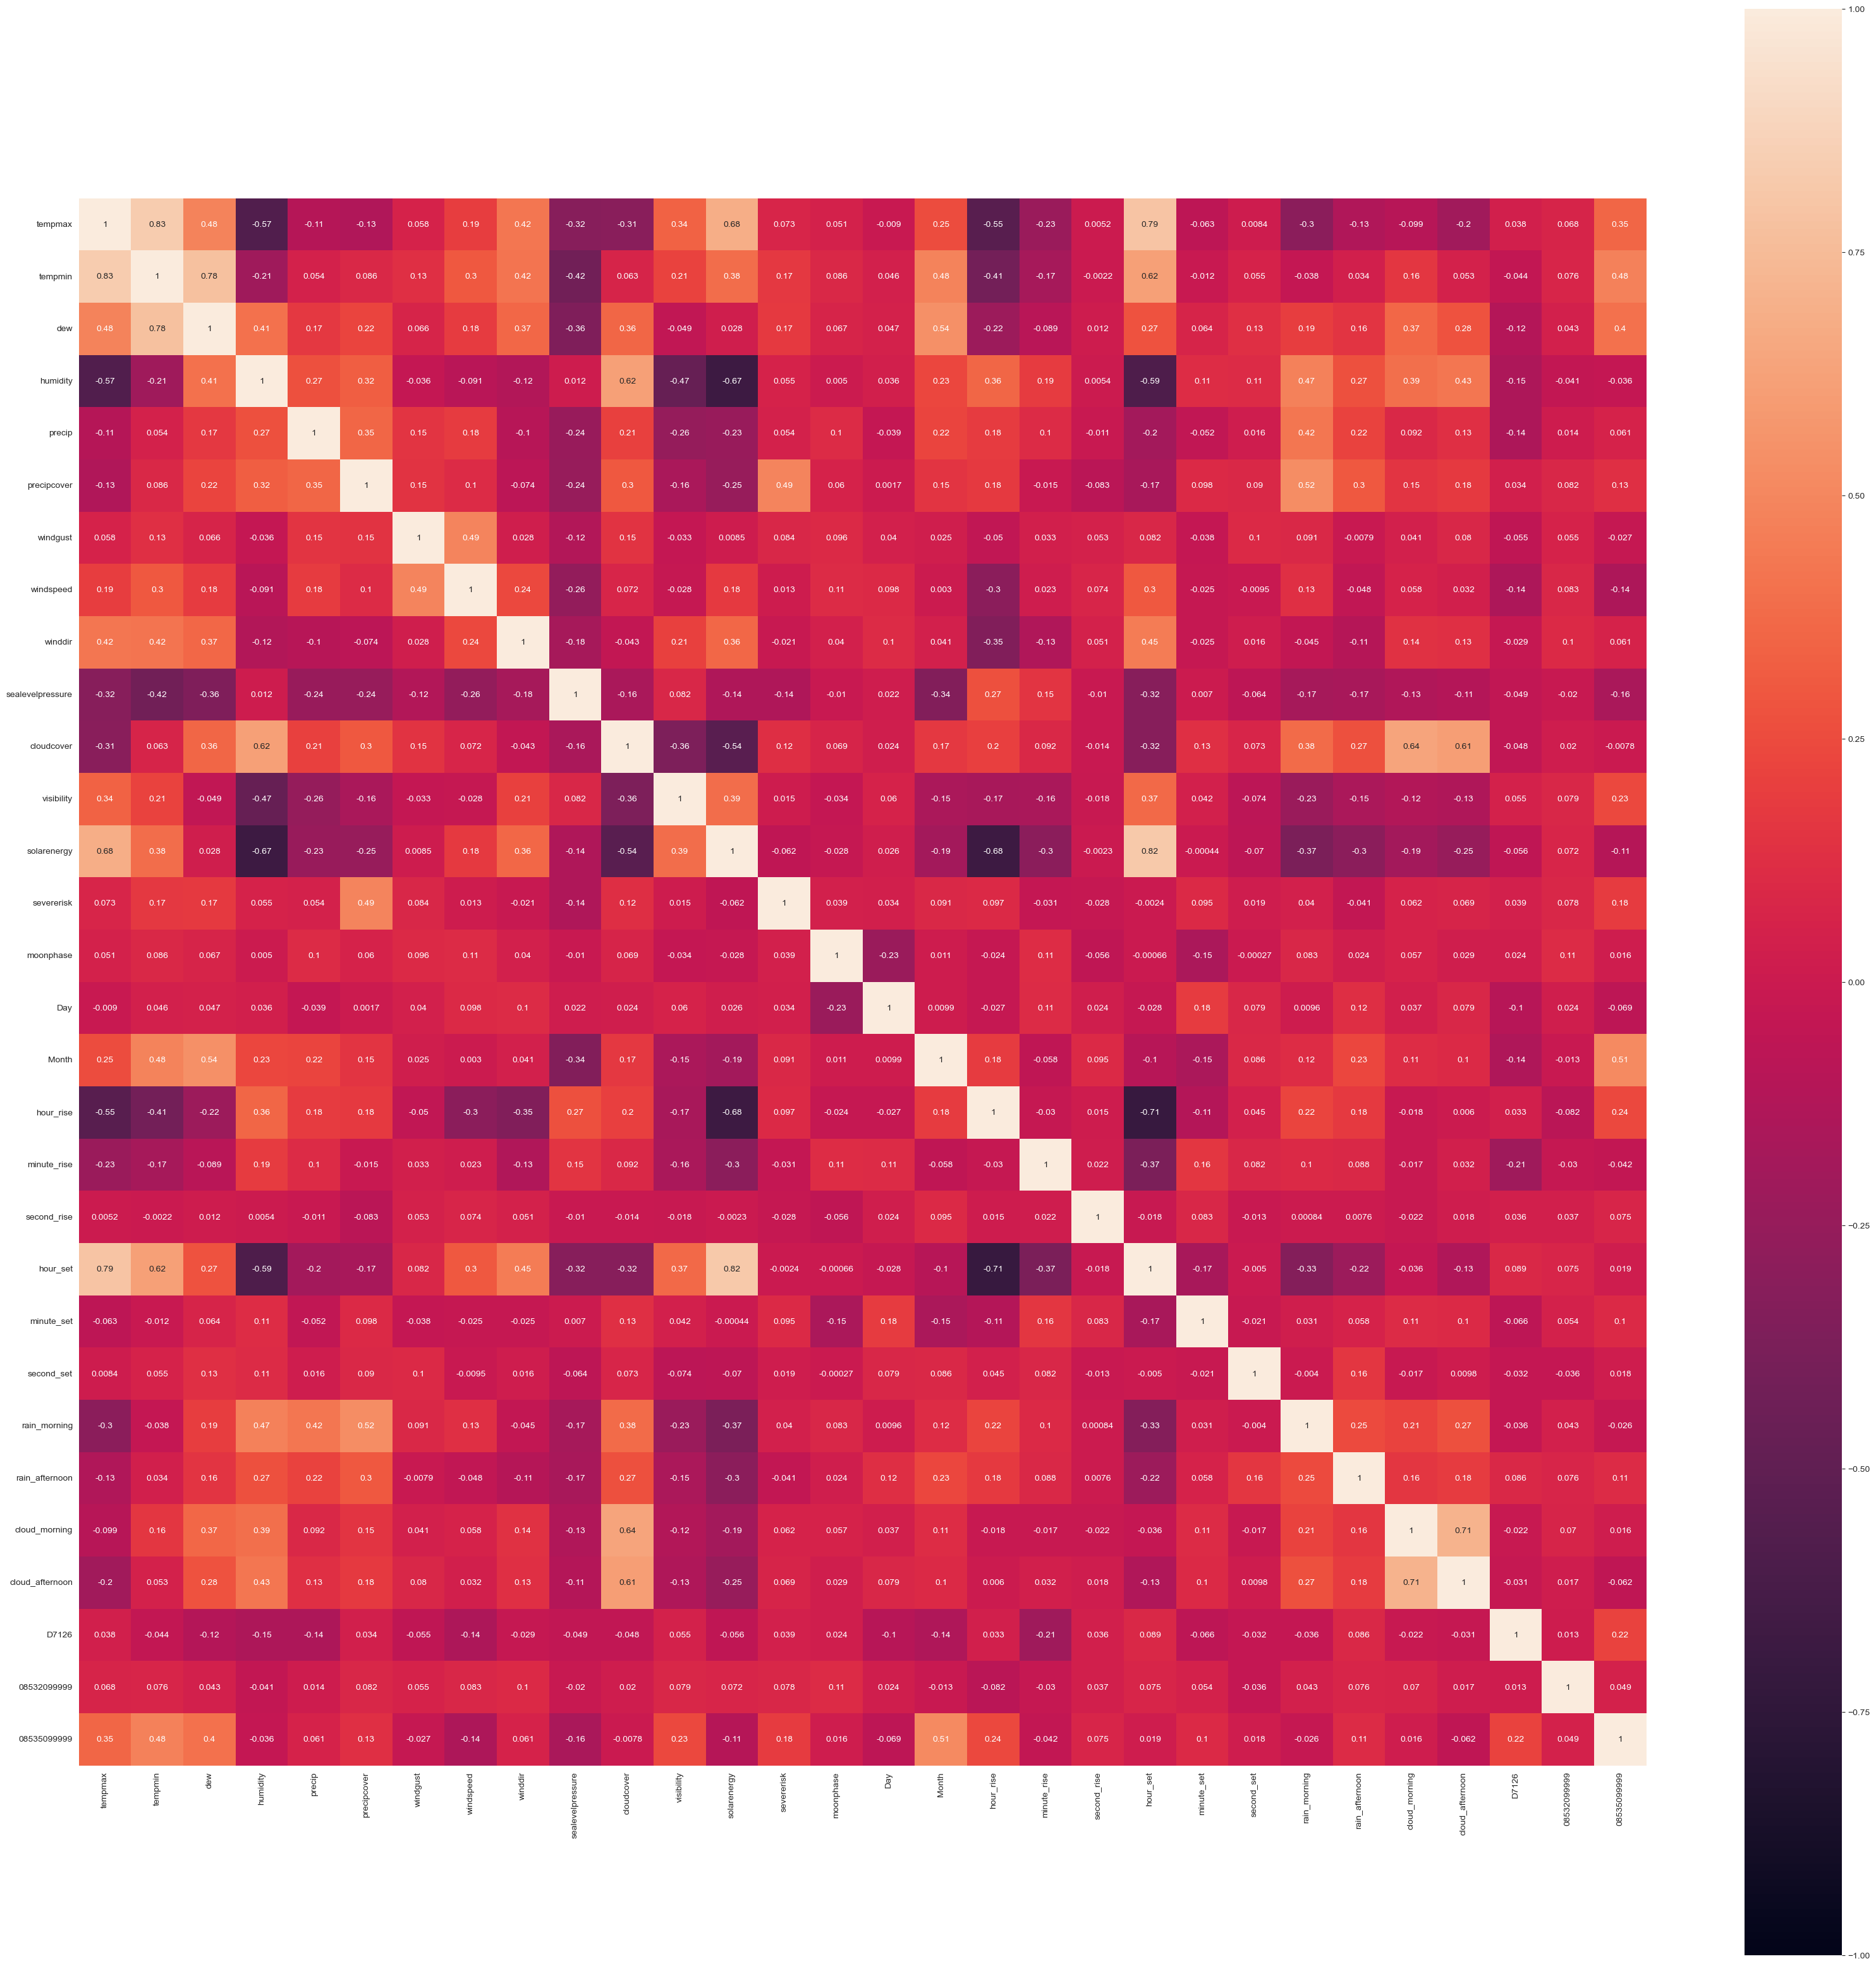

In [67]:
corr_matrix = df.corr()
f,ax =  plt.subplots(figsize = (40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, square=True)

In [68]:
X = df[['tempmax','tempmin',
     'dew','humidity','precip','precipcover',
     'windgust','windspeed','winddir','sealevelpressure','cloudcover','visibility',
     'severerisk', 'moonphase','Day','Month',
     'hour_rise','minute_rise','second_rise','hour_set','minute_set','second_set',
     'rain_morning','rain_afternoon','cloud_morning','cloud_afternoon',
     'D7126', '08532099999', '08535099999' ]]

In [69]:
y = df['solarenergy']

C:\Users\User\anaconda3\envs\da\lib\site-packages\seaborn\axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


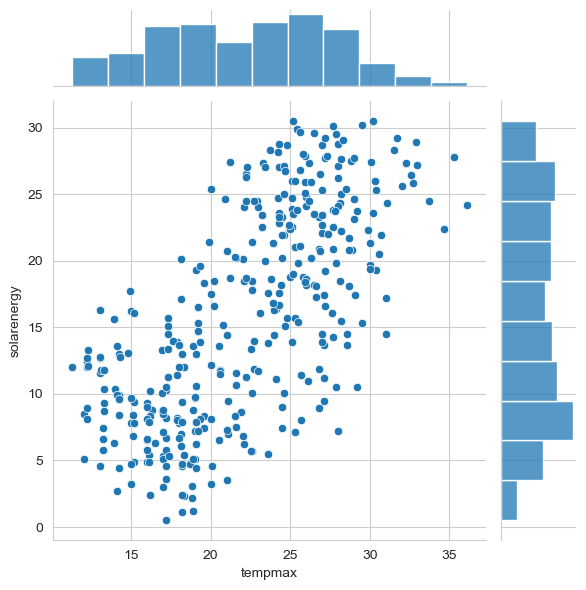

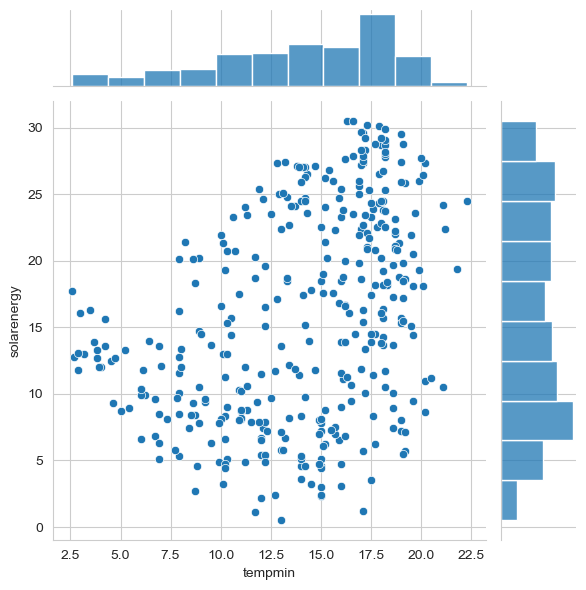

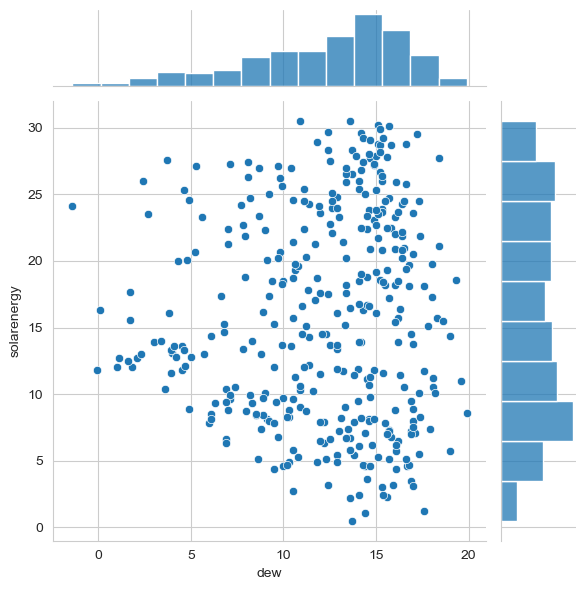

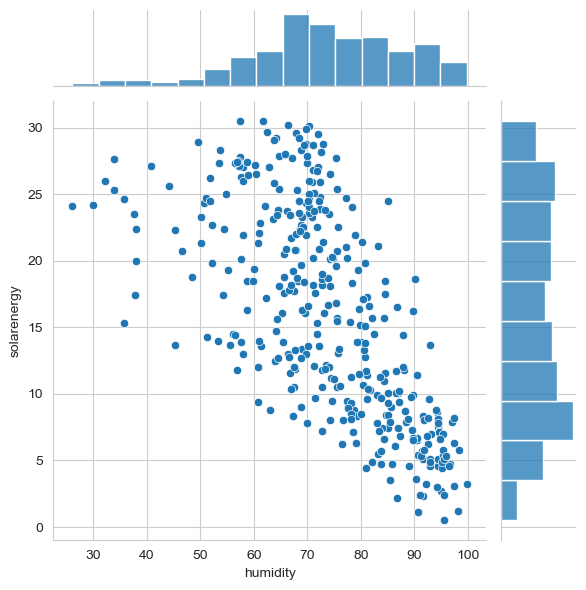

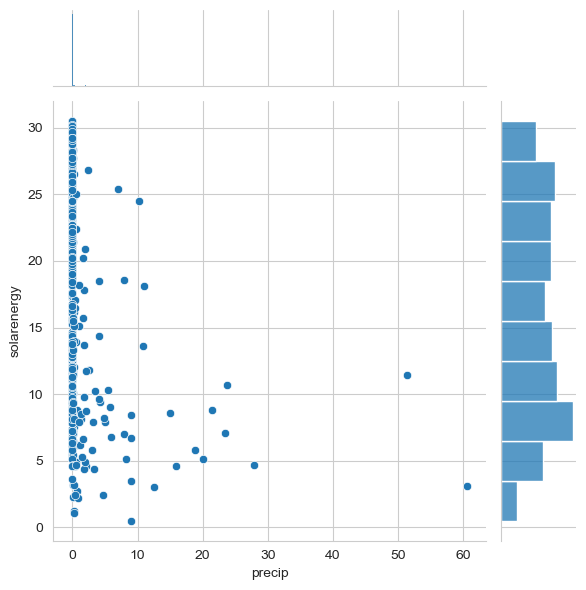

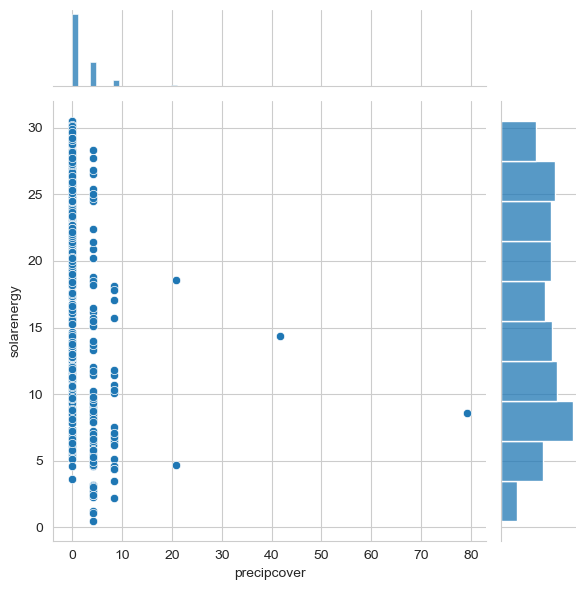

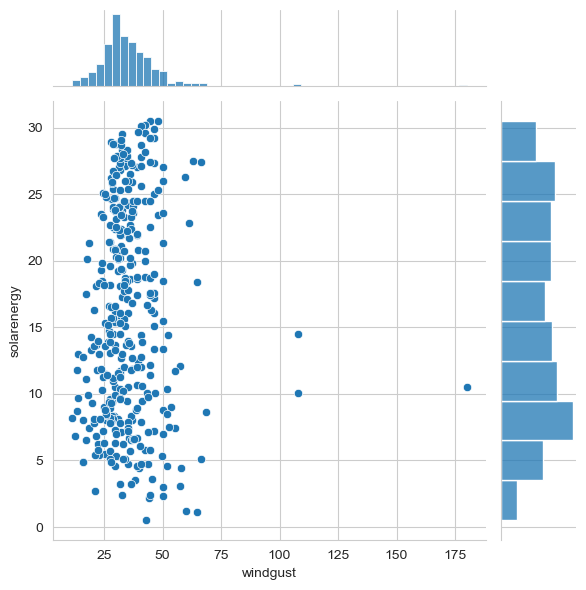

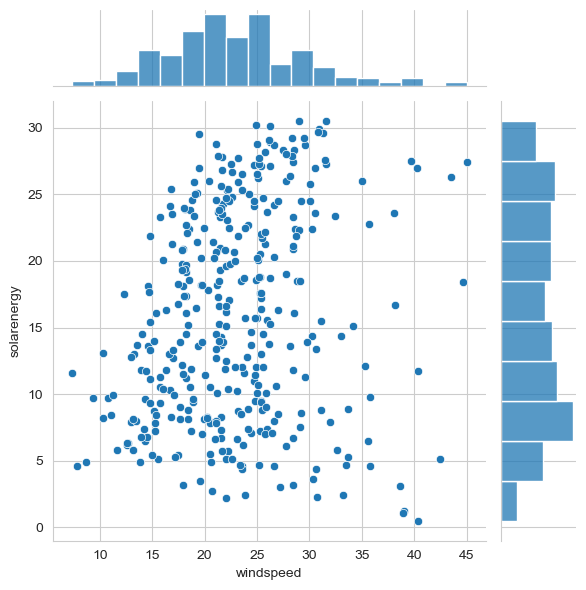

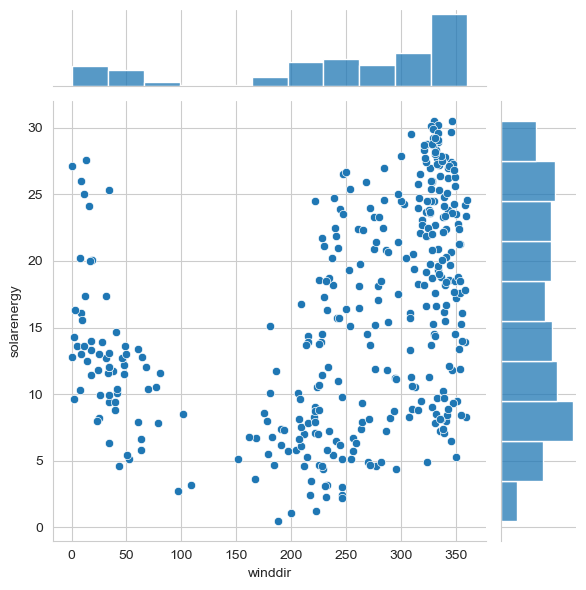

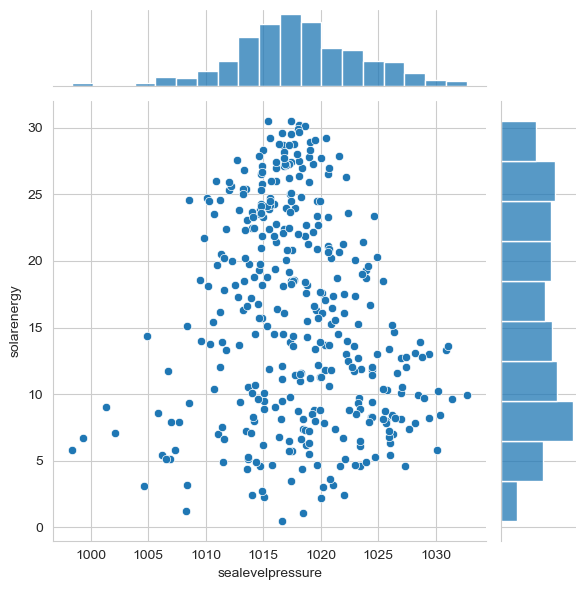

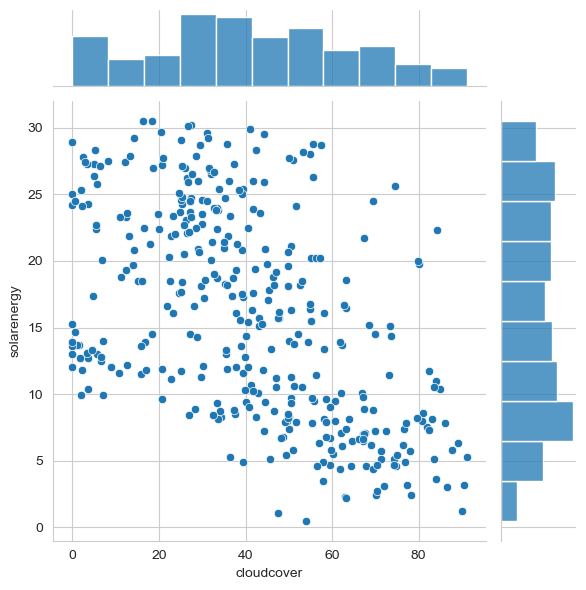

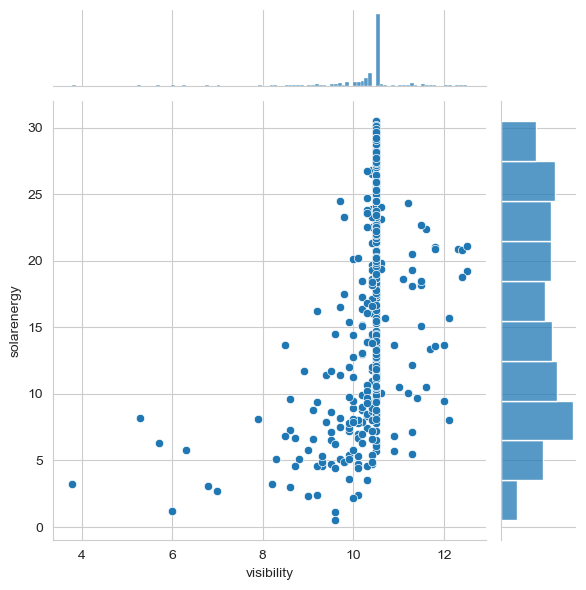

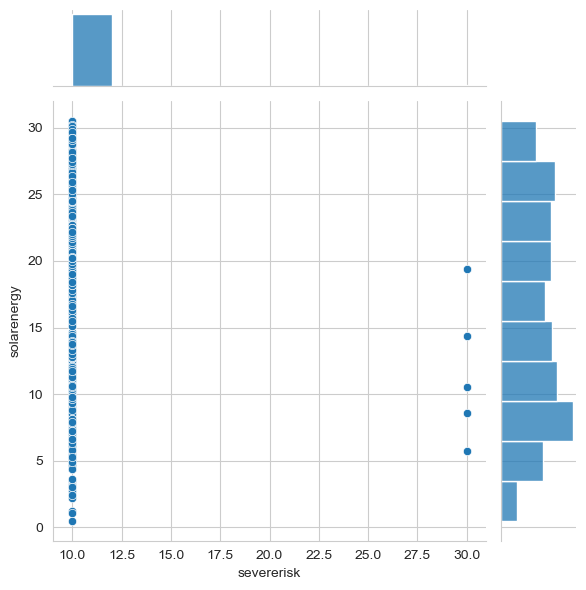

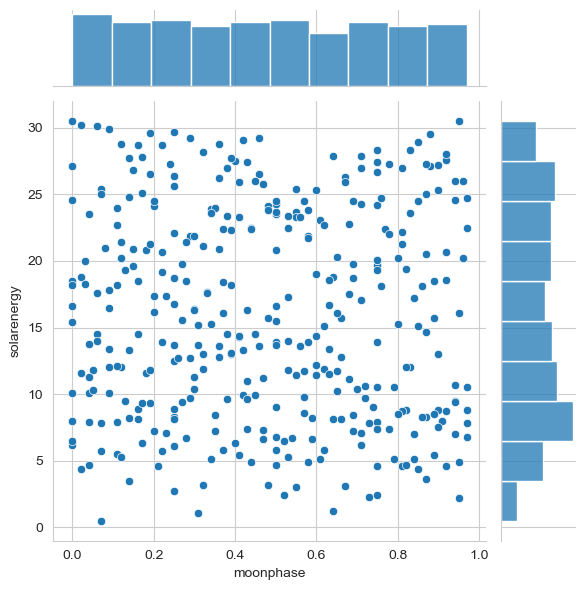

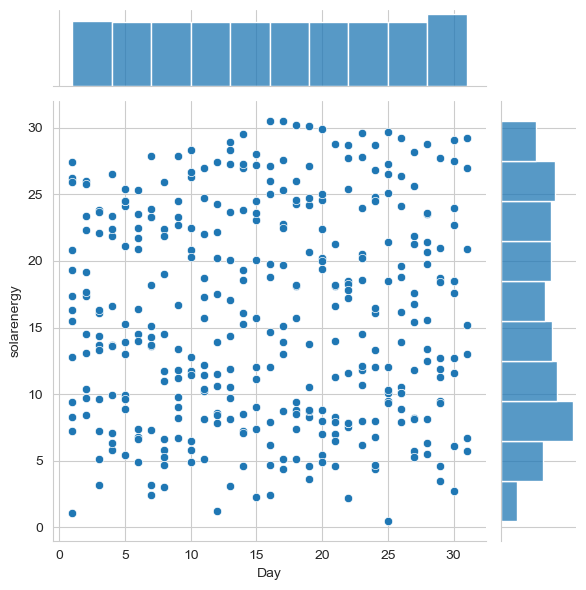

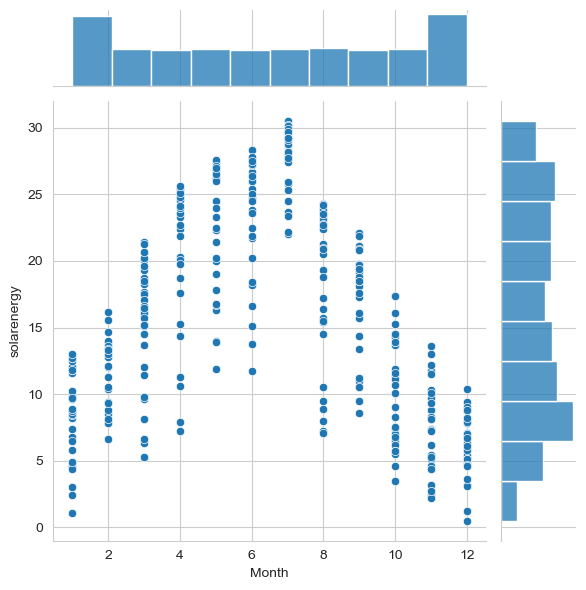

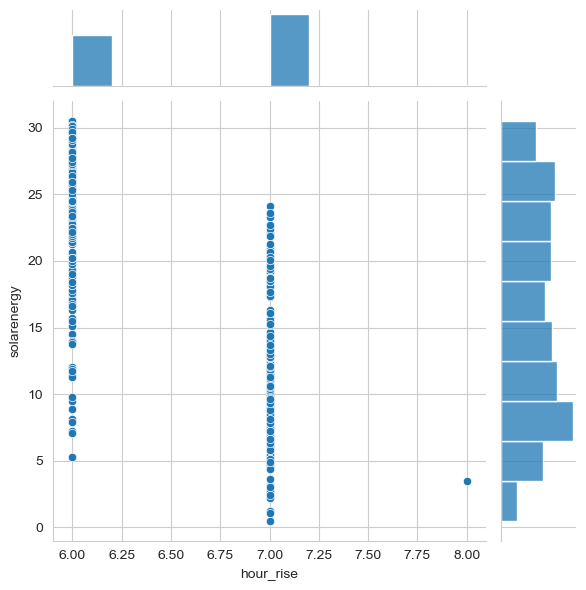

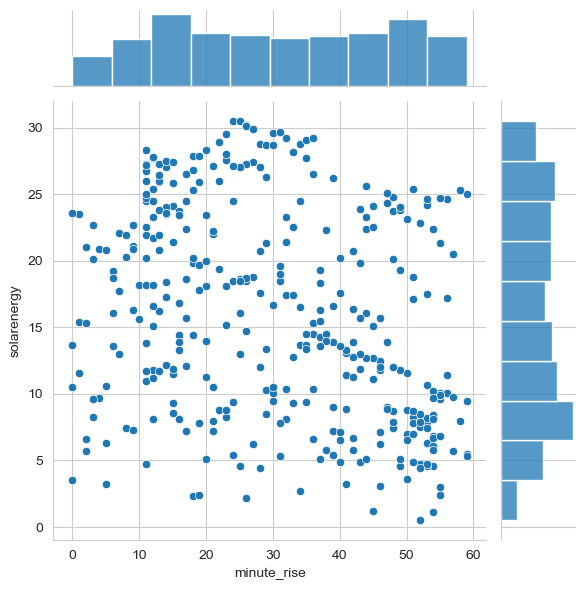

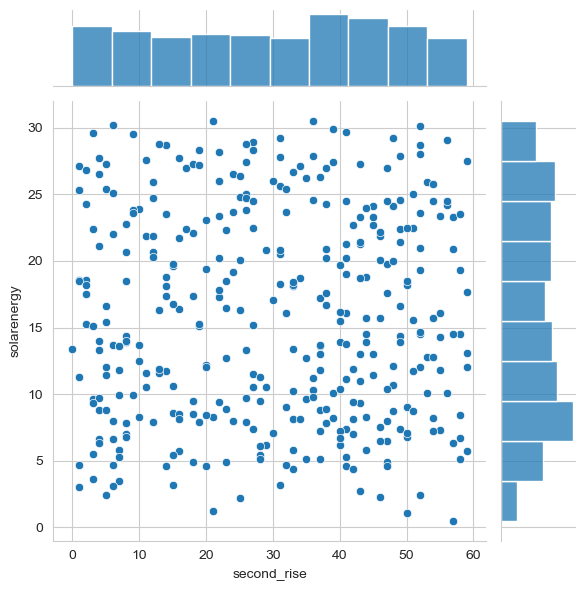

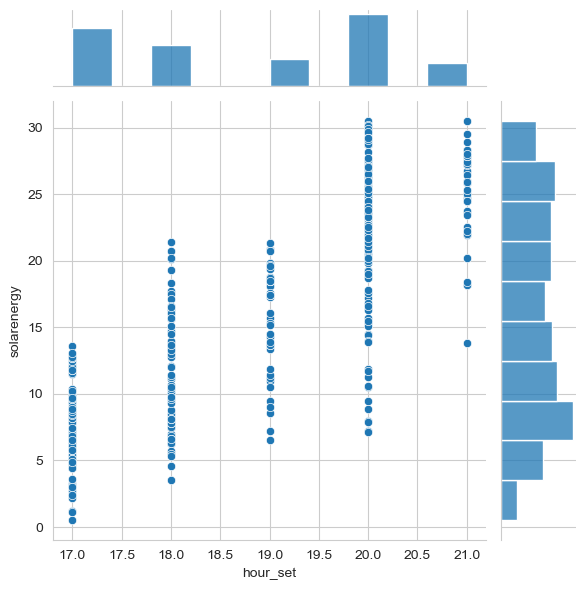

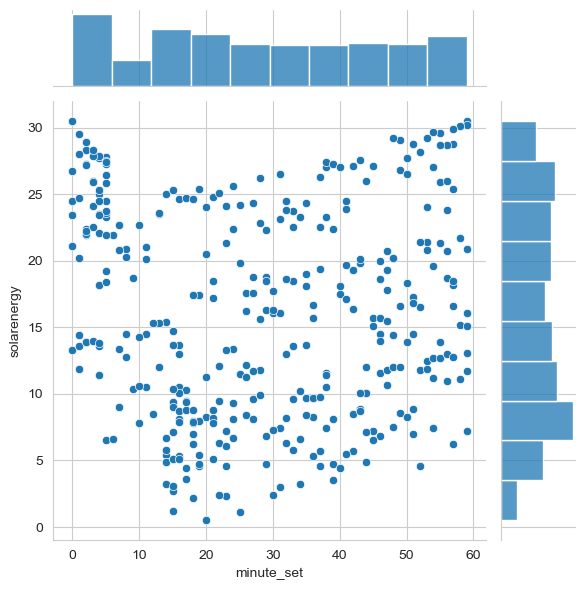

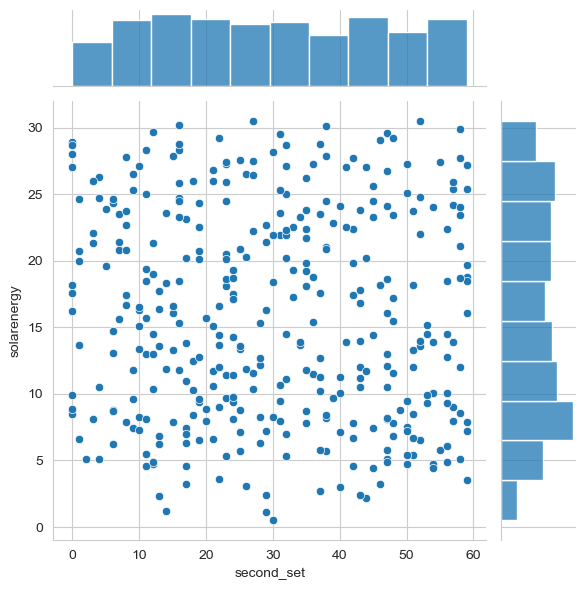

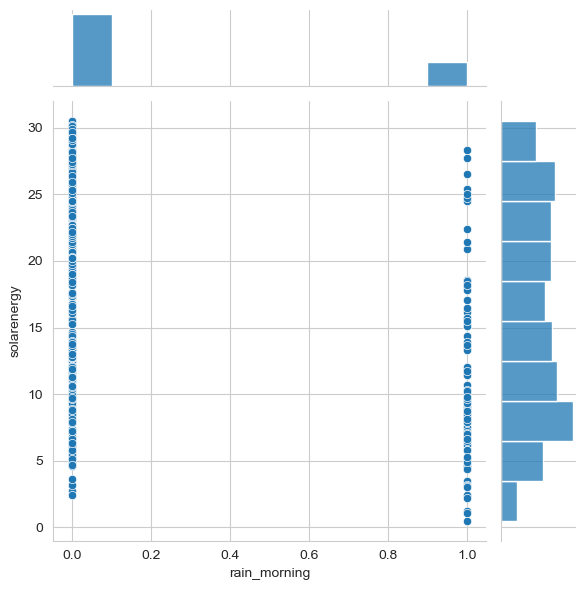

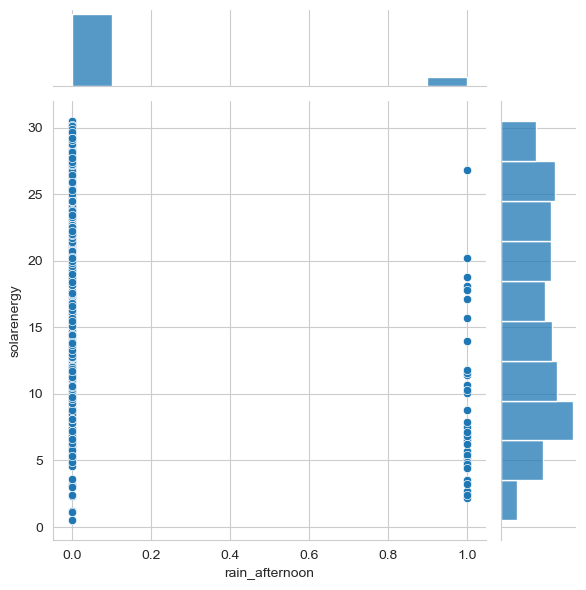

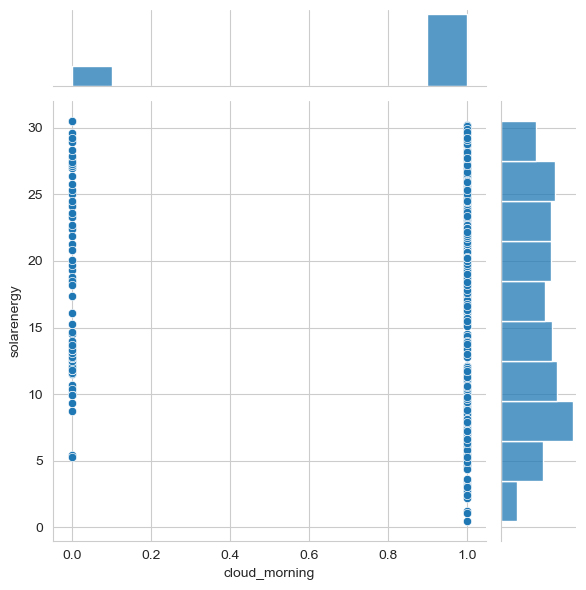

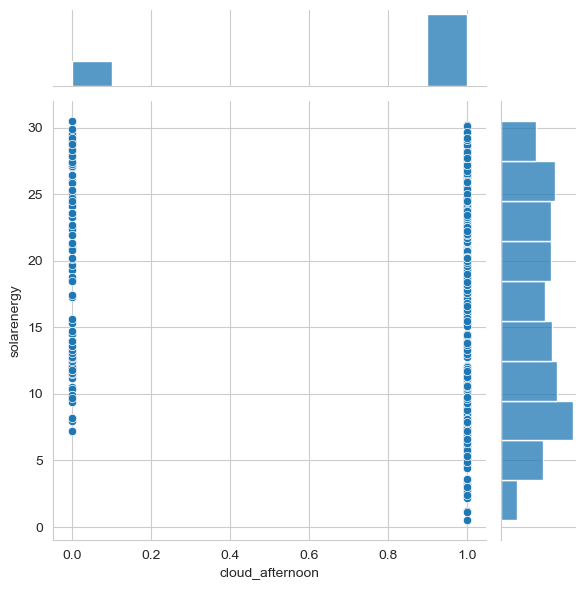

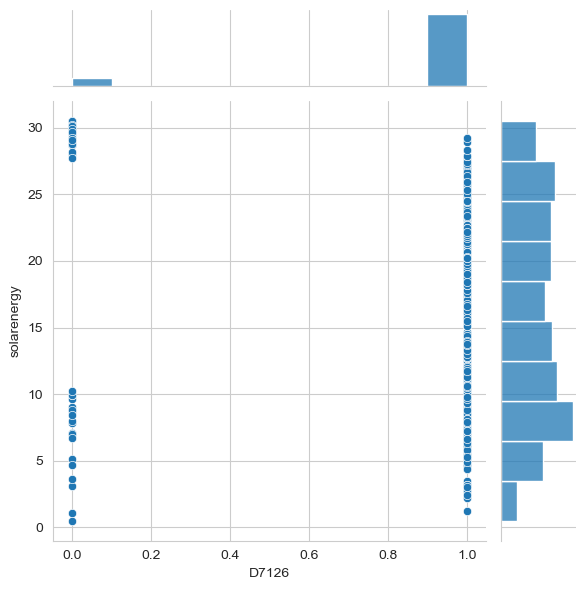

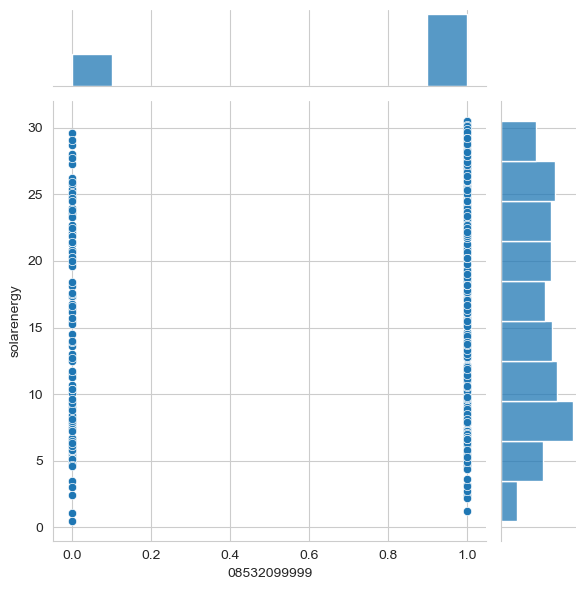

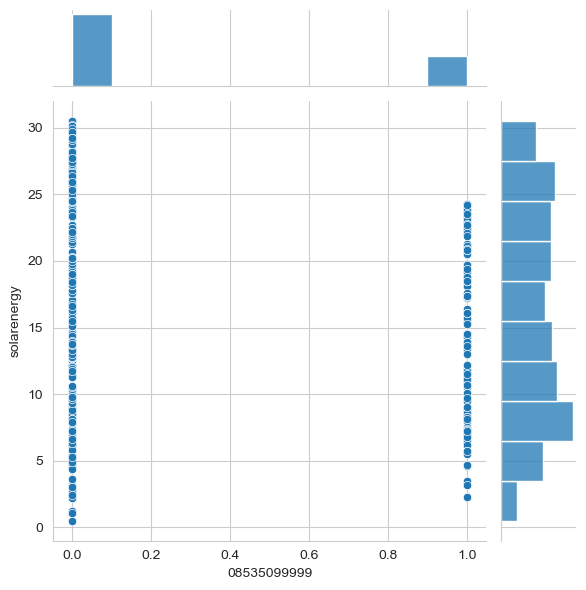

In [70]:
sns.set_style("whitegrid")
for at in X:
    sns.jointplot(x= at, y='solarenergy', data=df, kind='scatter')

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [73]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [74]:
print(lm.intercept_)

-65.91132618188558


In [75]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
tempmax,0.365433
tempmin,-0.223960
dew,-0.239372
humidity,-0.011285
precip,-0.003213
precipcover,0.208339
windgust,0.000787
windspeed,-0.073434
winddir,-0.000092
sealevelpressure,0.044462


In [76]:
predictions = lm.predict(X_test)

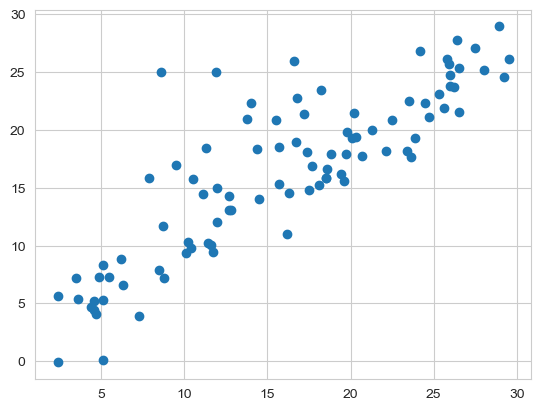

In [77]:
plt.scatter(y_test, predictions)

In [78]:
from sklearn import metrics

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.881590052499386
MSE: 15.886605477631193
RMSE: 3.985800481412886


In [80]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

print ( explained_variance_score(y_test, predictions) )
print ( r2_score(y_test, predictions) )

0.7237867662203461
0.7212755602075802


In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Defina o modelo de regressão linear como estimador
estimator = LinearRegression()

# Defina os hiperparâmetros que você deseja ajustar e os valores a serem testados
param_grid = {
    'fit_intercept': [True, False]
}

# Crie o objeto GridSearchCV
grid = GridSearchCV(estimator, param_grid, refit=True, verbose=2, cv=10)

# Ajuste o modelo aos dados
grid.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_int

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, verbose=2)

In [82]:
grid.best_estimator_

LinearRegression()

In [83]:
grid.best_params_

{'fit_intercept': True}

In [84]:
grid_predictions = grid.predict(X_test)

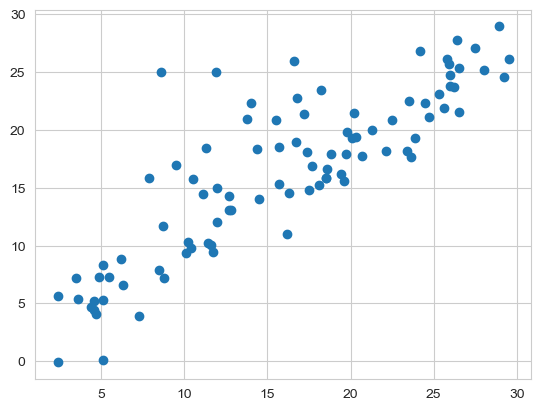

In [85]:
plt.scatter(y_test, grid_predictions)

In [86]:
print ( explained_variance_score(y_test, grid_predictions) )
print ( r2_score(y_test, grid_predictions) )

print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

0.7237867662203461
0.7212755602075802
MAE: 2.881590052499386
MSE: 15.886605477631193
RMSE: 3.985800481412886


In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeRegressor()

# Defina os hiperparâmetros que você deseja ajustar e os valores a serem testados
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    
    'splitter':  ['best', 'random'],
    
    'max_depth': [5,10,15]
    
}

# Crie o objeto GridSearchCV
grid = GridSearchCV(estimator, param_grid, refit=True, verbose=2, cv=10)

# Ajuste o modelo aos dados
grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END criterion=squared_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=

[CV] END criterion=friedman_mse, max_depth=15, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, splitter=random; total time=   0.0s
[CV] END crite

[CV] END .....criterion=poisson, max_depth=10, splitter=best; total time=   0.0s
[CV] END .....criterion=poisson, max_depth=10, splitter=best; total time=   0.0s
[CV] END .....criterion=poisson, max_depth=10, splitter=best; total time=   0.0s
[CV] END .....criterion=poisson, max_depth=10, splitter=best; total time=   0.0s
[CV] END .....criterion=poisson, max_depth=10, splitter=best; total time=   0.0s
[CV] END .....criterion=poisson, max_depth=10, splitter=best; total time=   0.0s
[CV] END ...criterion=poisson, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=poisson, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=poisson, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=poisson, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=poisson, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=poisson, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=poisso

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 15],
                         'splitter': ['best', 'random']},
             verbose=2)

In [88]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 5, 'splitter': 'random'}

In [89]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=5, splitter='random')

In [90]:
grid_predictions = grid.predict(X_test)

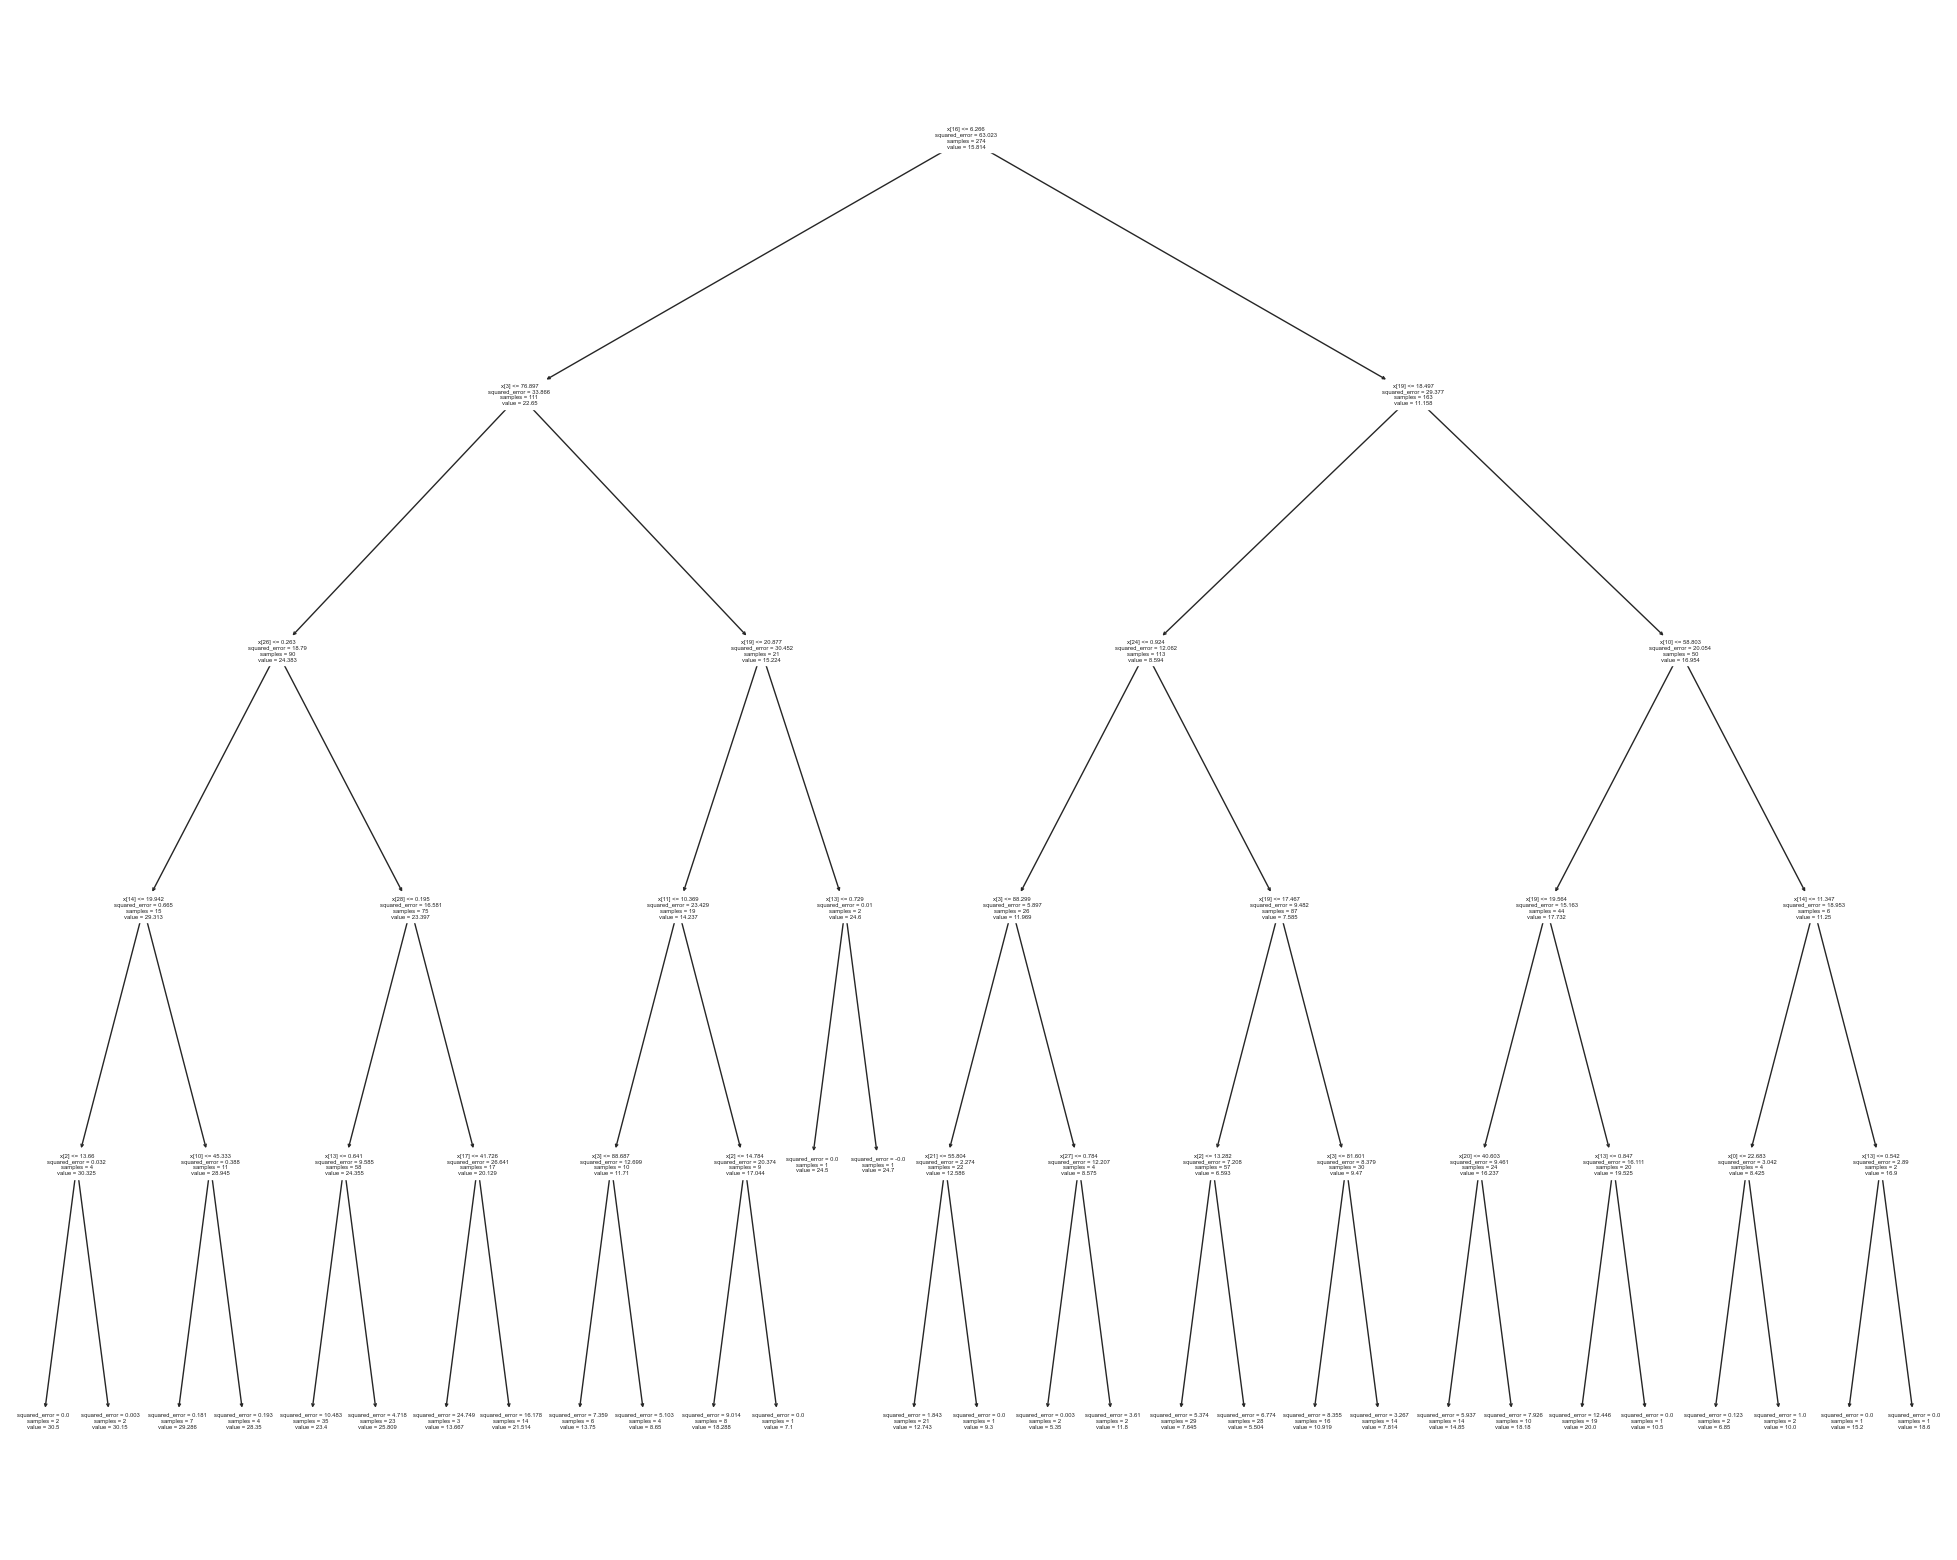

In [91]:
from sklearn import tree
fig = plt.figure(figsize = (25,20))
tree.plot_tree(grid.best_estimator_)
plt.show()

In [92]:
print ( explained_variance_score(y_test, grid_predictions) )
print ( r2_score(y_test, grid_predictions) )

print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

0.6706747609102998
0.6634039910247573
MAE: 3.5780896052362015
MSE: 19.185142156595035
RMSE: 4.380084720253141


In [93]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeRegressor()

# Defina os hiperparâmetros que você deseja ajustar e os valores a serem testados
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    
    'splitter':  ['best', 'random'],
    
    'max_depth': [2,3,4,5,6,7,8],   
}

# Crie o objeto GridSearchCV
grid = GridSearchCV(estimator, param_grid, refit=True, verbose=2, cv=10)

# Ajuste o modelo aos dados
grid.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] END criterion=squared_error, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=

[CV] END criterion=squared_error, max_depth=8, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, splitter=random; total time=   0.0s
[CV] END criterion

[CV] END .criterion=friedman_mse, max_depth=6, splitter=best; total time=   0.0s
[CV] END .criterion=friedman_mse, max_depth=6, splitter=best; total time=   0.0s
[CV] END .criterion=friedman_mse, max_depth=6, splitter=best; total time=   0.0s
[CV] END .criterion=friedman_mse, max_depth=6, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, splitter=random; total time=   0.0s
[CV] END criterion=f

[CV] END criterion=absolute_error, max_depth=4, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=4, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=4, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=4, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=4, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=4, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=4, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=4, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=4, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=4, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, splitter=best; total time=   0

[CV] END ....criterion=poisson, max_depth=3, splitter=random; total time=   0.0s
[CV] END ....criterion=poisson, max_depth=3, splitter=random; total time=   0.0s
[CV] END ....criterion=poisson, max_depth=3, splitter=random; total time=   0.0s
[CV] END ....criterion=poisson, max_depth=3, splitter=random; total time=   0.0s
[CV] END ....criterion=poisson, max_depth=3, splitter=random; total time=   0.0s
[CV] END ....criterion=poisson, max_depth=3, splitter=random; total time=   0.0s
[CV] END ....criterion=poisson, max_depth=3, splitter=random; total time=   0.0s
[CV] END ......criterion=poisson, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=poisson, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=poisson, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=poisson, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=poisson, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=poi

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             verbose=2)

In [94]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 7, 'splitter': 'random'}

In [95]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=7, splitter='random')

In [96]:
grid_predictions = grid.predict(X_test)

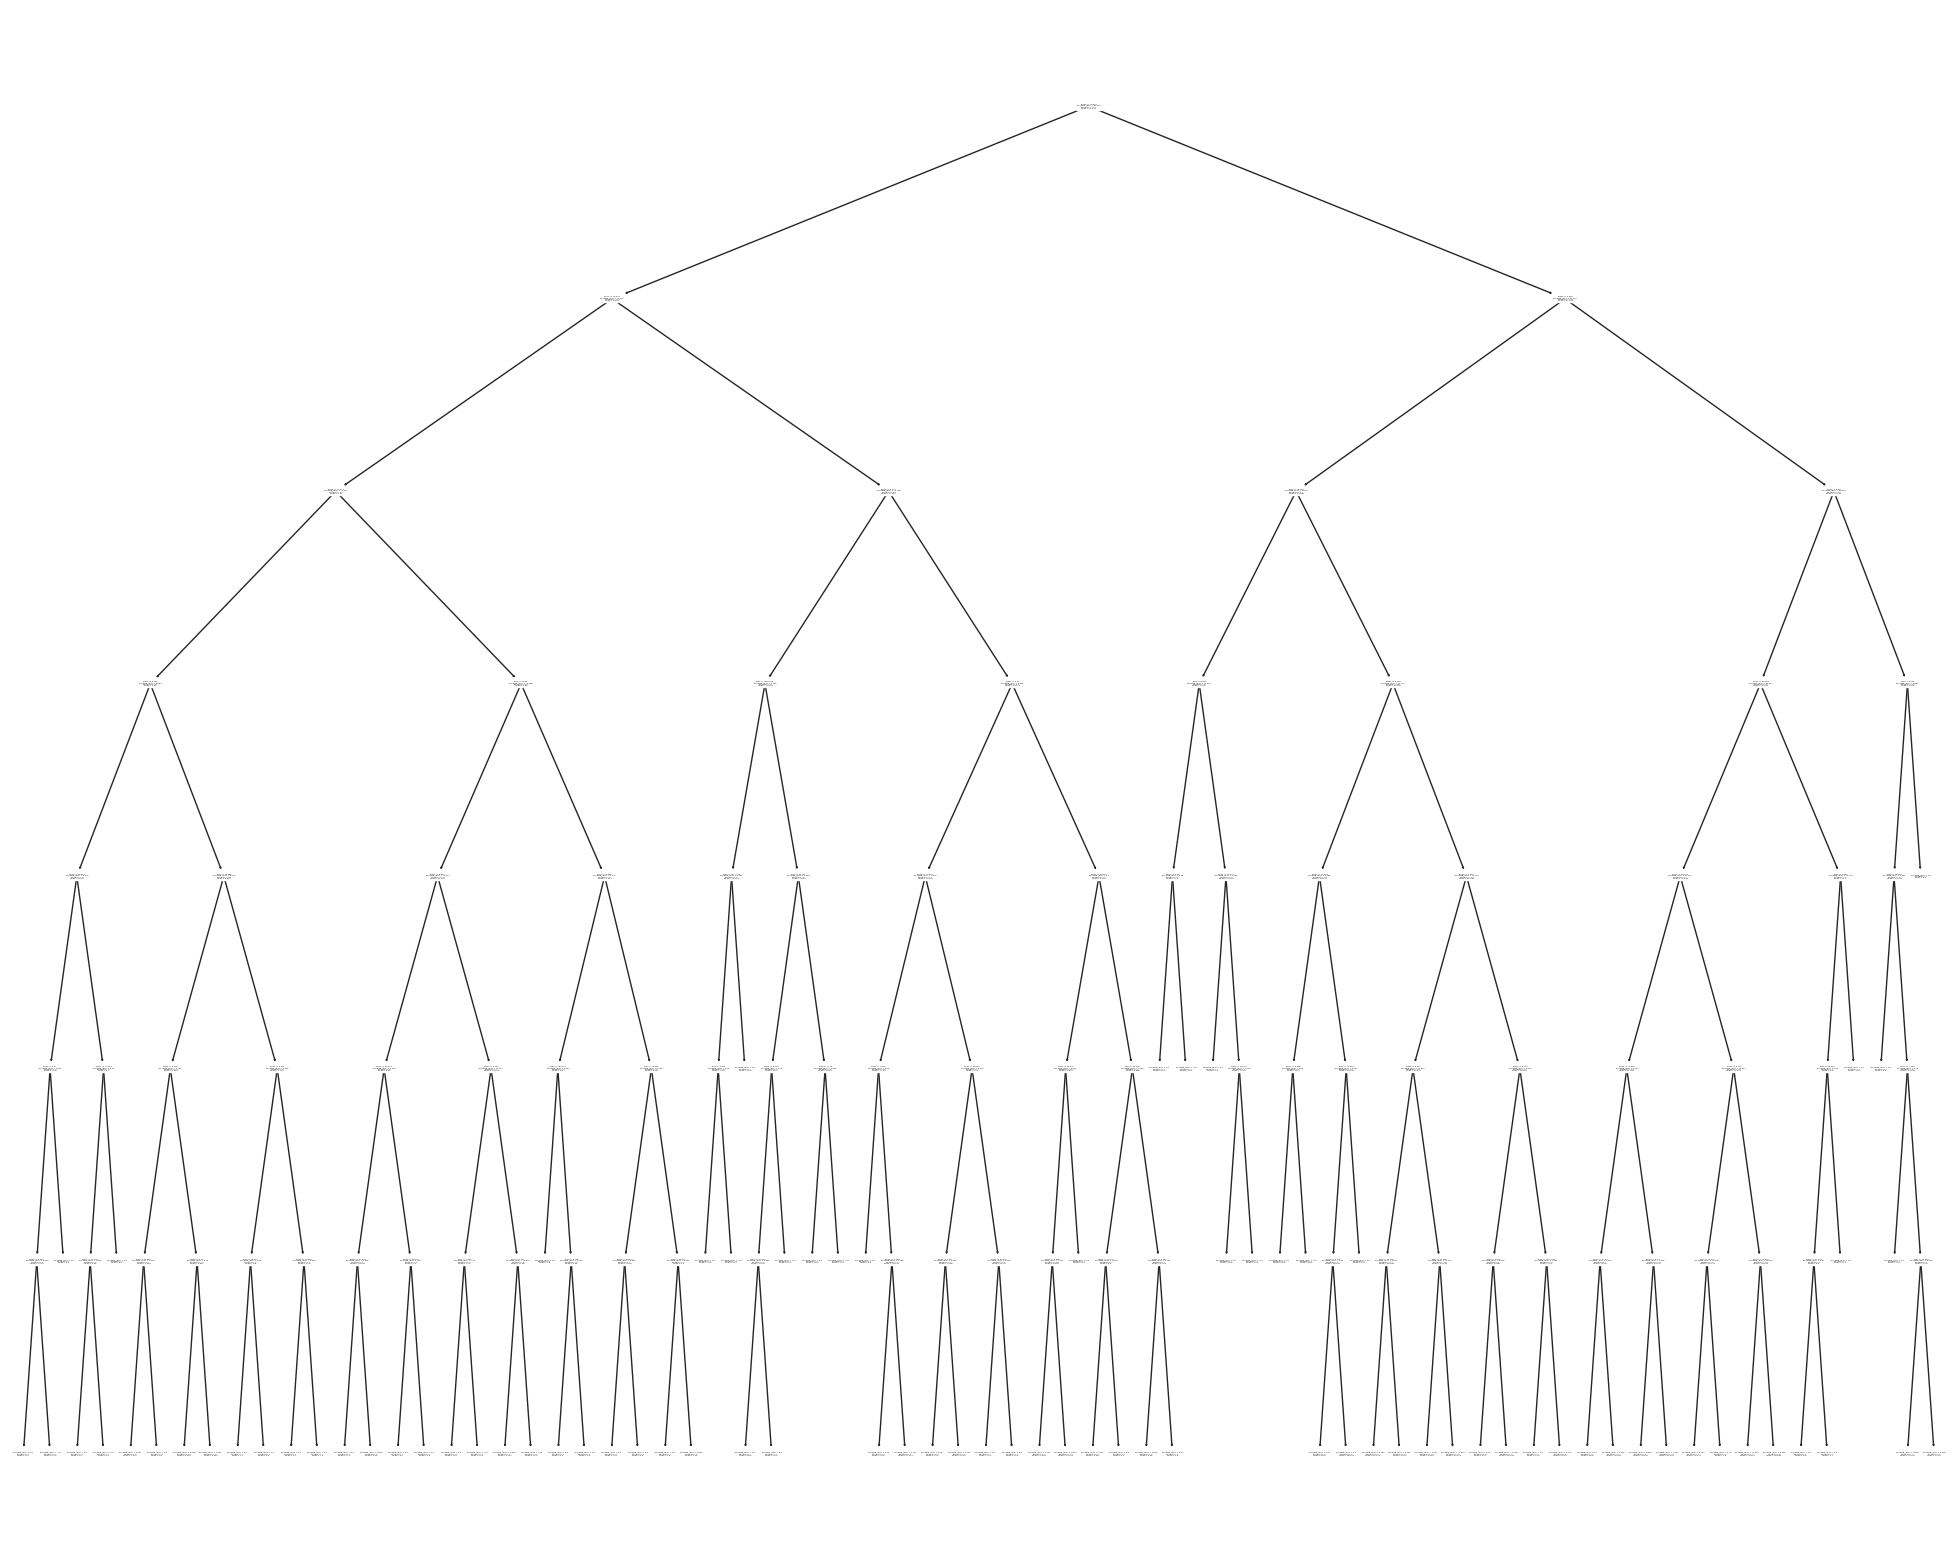

In [97]:
fig = plt.figure(figsize = (25,20))
tree.plot_tree(grid.best_estimator_)
plt.show()

In [98]:
print ( explained_variance_score(y_test, grid_predictions) )
print ( r2_score(y_test, grid_predictions) )

print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

0.6434275375265341
0.6428499152703693
MAE: 3.2345940512788336
MSE: 20.35667376936102
RMSE: 4.511837072563793


In [99]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, grid_predictions)

0.2707894392305239

In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeRegressor()

# Defina os hiperparâmetros que você deseja ajustar e os valores a serem testados
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    
    'splitter':  ['best', 'random'],
    
    'max_depth': [2,3,4,5,6,7,8,9],
    
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crie o objeto GridSearchCV
grid = GridSearchCV(estimator, param_grid, refit=True, verbose=2, cv=10)

# Ajuste o modelo aos dados
grid.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
[CV] END criterion=squared_error, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, m

[CV] END criterion=squared_error, max_depth=3, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, splitter=random; total tim

[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=random; total

[CV] END criterion=squared_error, max_depth=7, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, max_features=sqrt, splitter=best; total

[CV] END criterion=squared_error, max_depth=8, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_features=log2, splitter=random; total tim

[CV] END criterion=friedman_mse, max_depth=2, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, max_features=sqrt, splitter=random; total time=   0.0

[CV] END criterion=friedman_mse, max_depth=4, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=4, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=4, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=4, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=4, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=4, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=4, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=4, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=4, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=4, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END

[CV] END criterion=friedman_mse, max_depth=5, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, max_features=auto, splitter=best; total time=   0

[CV] END criterion=friedman_mse, max_depth=7, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, max_features=sqrt, splitter=random; total time=   0.0s
[CV]

[CV] END criterion=friedman_mse, max_depth=8, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=8, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=8, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=8, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=8, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=8, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=8, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=8, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=8, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=8, max_features=log2, splitter=random; total time=

[CV] END criterion=absolute_error, max_depth=2, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=2, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=2, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=2, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=2, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=2, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=2, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=2, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=2, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=2, max_features=sqrt, splitter=random; t

[CV] END criterion=absolute_error, max_depth=3, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, splitter=r

[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, splitter=random; t

[CV] END criterion=absolute_error, max_depth=7, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=7, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=7, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=7, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=7, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=7, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=7, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=7, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=7, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=7, max_features=log2, splitter

[CV] END criterion=absolute_error, max_depth=9, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=9, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=9, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=9, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=9, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=9, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=9, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=9, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=9, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=9, max_features=log2, splitter=best;

[CV] END criterion=poisson, max_depth=3, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, m

[CV] END criterion=poisson, max_depth=4, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=4, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=4, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=4, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=5, max_feature

[CV] END criterion=poisson, max_depth=6, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=6, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=6, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=6, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=6, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=6, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=6, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=6, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=6, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=6, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=6, max_f

[CV] END criterion=poisson, max_depth=8, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=8, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=8, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=8, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=8, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=8, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=8, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=8, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=8, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=8, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=8, max_f

C:\Users\User\anaconda3\envs\da\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\da\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\envs\da\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\envs\da\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Us

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=2)

In [101]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [102]:
grid.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='sqrt')

In [103]:
grid_predictions = grid.predict(X_test)

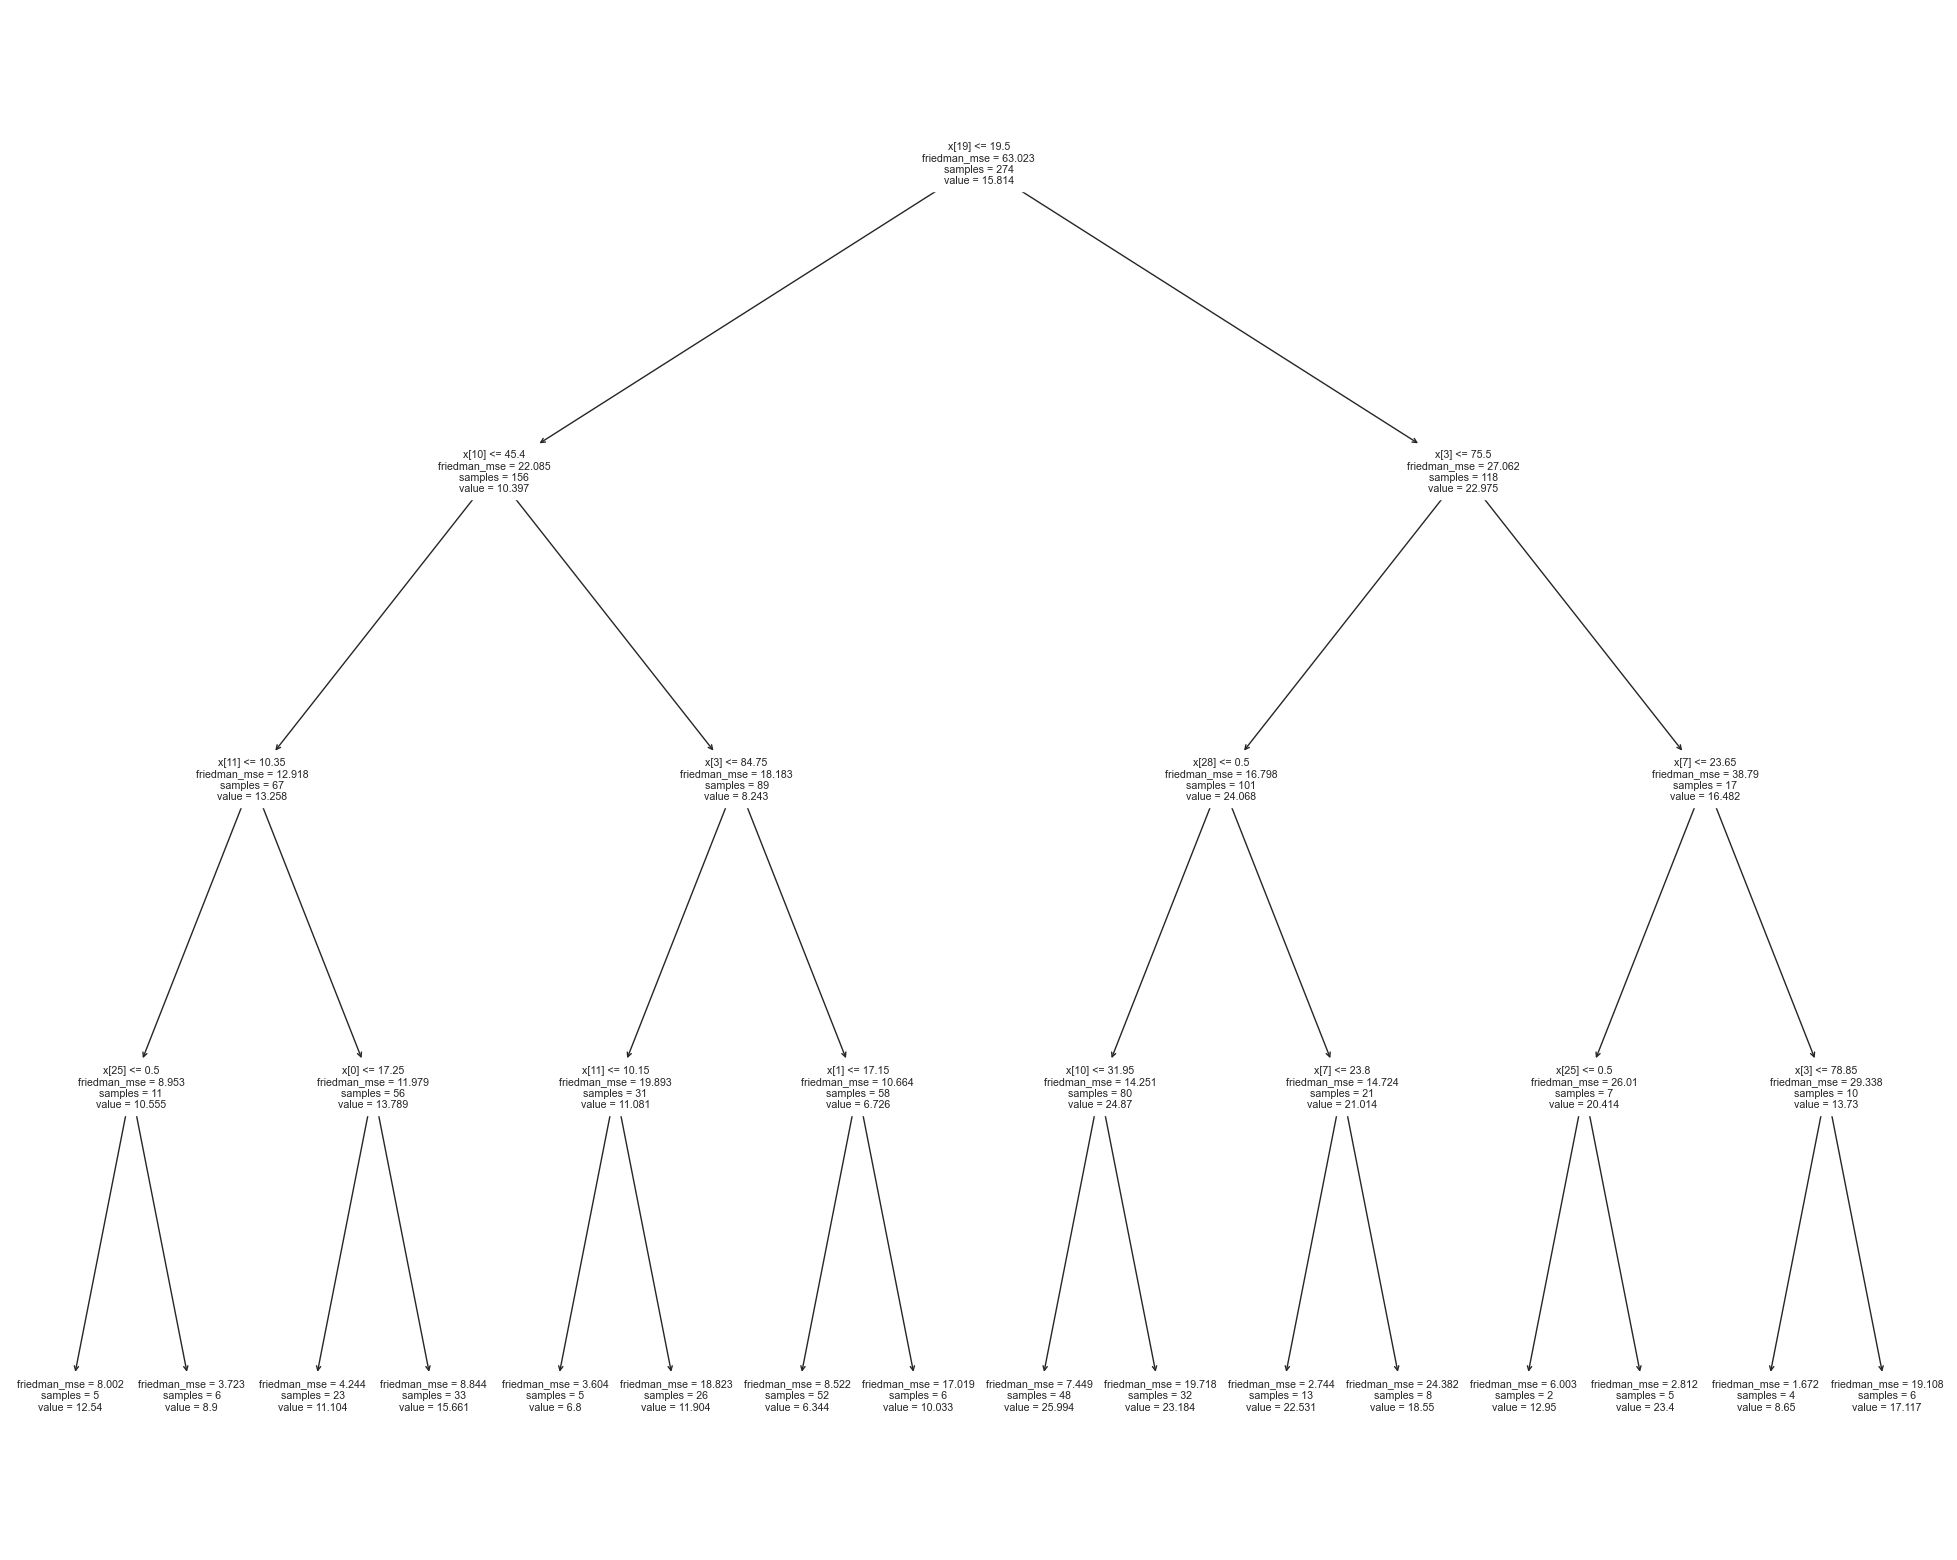

In [104]:
fig = plt.figure(figsize = (25,20))
tree.plot_tree(grid.best_estimator_)
plt.show()

In [105]:
print ( explained_variance_score(y_test, grid_predictions) )
print ( r2_score(y_test, grid_predictions) )
print(mean_absolute_percentage_error(y_test, grid_predictions))

print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))


0.6394328230060482
0.6391238259956342
0.318586745434805
MAE: 3.569071378271226
MSE: 20.569051666061547
RMSE: 4.535311639354185


In [106]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

estimator = SVR()

# Defina os hiperparâmetros que você deseja ajustar e os valores a serem testados
param_grid = {
    'kernel': [ 'rbf', 'sigmoid'],
    
    'gamma' : [1,0.1,0.01,0.001,0.0001 ],
    
    'C'    : [0.1,1,10,100,1000]
 
}

# Crie o objeto GridSearchCV
grid = GridSearchCV(estimator, param_grid, refit=True, verbose=2, cv=10)

# Ajuste o modelo aos dados
grid.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, 

[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .................C=

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [107]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [108]:
grid.best_estimator_

SVR(C=100, gamma=0.0001)

In [109]:
grid_predictions = grid.predict(X_test)

In [110]:
print ( explained_variance_score(y_test, grid_predictions) )
print ( r2_score(y_test, grid_predictions) )
print(mean_absolute_percentage_error(y_test, grid_predictions))

print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))


0.6359658051846795
0.6331919072487173
0.3117466658237353
MAE: 3.5538226808216784
MSE: 20.907156401074445
RMSE: 4.572434406426673


In [111]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

estimator = SVR()

# Defina os hiperparâmetros que você deseja ajustar e os valores a serem testados
param_grid = {
    'kernel': [ 'rbf', 'sigmoid'],
    
    'gamma' : [1,0.1,0.01,0.001,0.0001 ],
    
    'C'    : [0.1,1,10,100,1000]
 
}

# Crie o objeto GridSearchCV
grid = GridSearchCV(estimator, param_grid, refit=True, verbose=2, cv=10)

# Ajuste o modelo aos dados
grid.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, 

[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [112]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [113]:
grid.best_estimator_

SVR(C=100, gamma=0.0001)

In [114]:
grid_predictions = grid.predict(X_test)

In [115]:
print ( explained_variance_score(y_test, grid_predictions) )
print ( r2_score(y_test, grid_predictions) )
print(mean_absolute_percentage_error(y_test, grid_predictions))

print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

0.6359658051846795
0.6331919072487173
0.3117466658237353
MAE: 3.5538226808216784
MSE: 20.907156401074445
RMSE: 4.572434406426673
